In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns
import plotly.subplots
#from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         9497 non-null   object 
 1   Well-being        9497 non-null   float64
 2   Needs             9497 non-null   float64
 3   Engagement        9497 non-null   float64
 4   Autonomy          9497 non-null   float64
 5   Belonging         9497 non-null   float64
 6   Competence        9497 non-null   float64
 7   Leadership        9497 non-null   float64
 8   Management        9497 non-null   float64
 9   Returns           9497 non-null   float64
 10  Rewards           9497 non-null   float64
 11  Status            9497 non-null   float64
 12  Myself            9497 non-null   int64  
 13  Tasks             9497 non-null   int64  
 14  Free              9497 non-null   int64  
 15  Mastery           9497 non-null   int64  
 16  Competent         9497 non-null   int64  


Enter the column name for the x-axis:  Frustrated
Enter the column name for the y-axis:  Well-being


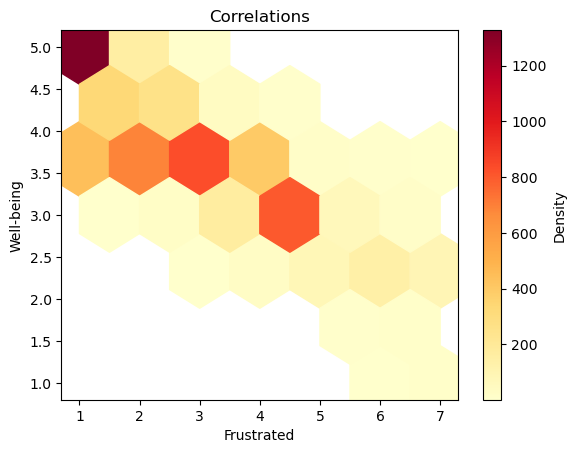

In [176]:
# density heatmap where the user is prompted to select the x and y axis variables,
# with the color of the hexagons dot determined by the number of observations in (x, y) cell


# Reset the index
#df = df.reset_index()

# Prompt the user to select x and y axis variables
x_axis = input("Enter the column name for the x-axis: ")
y_axis = input("Enter the column name for the y-axis: ")
#position = input("Enter Volunteer or Staff or both: ")

# Plot the density heatmap using hexbin
plt.hexbin(df[x_axis], df[y_axis], gridsize=6, cmap='YlOrRd', mincnt=1)

# Add a colorbar to indicate the density
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Correlations')

# Show the plot
plt.savefig('Well-being vs Strong.png')
plt.show()


Enter the column name for the x-axis:  Autonomy
Enter the column name for the y-axis:  Frustrated


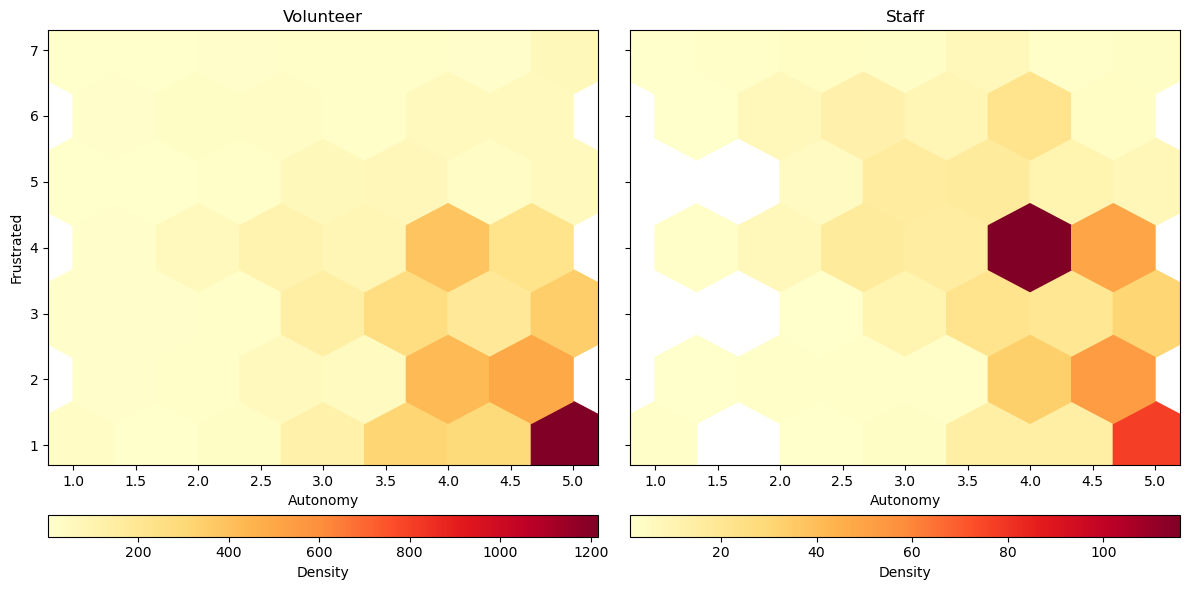

In [6]:

# Prompt the user to select x and y axis variables
x_axis = input("Enter the column name for the x-axis: ")
y_axis = input("Enter the column name for the y-axis: ")

# Filter the dataframe for 'Position' = 'Volunteer'
df_volunteer = df[df['Position'] == 'Volunteer']

# Filter the dataframe for 'Position' = 'Staff'
df_staff = df[df['Position'] == 'Staff']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Plot the density heatmap for 'Position' = 'Volunteer'
hex1 = ax1.hexbin(df_volunteer[x_axis], df_volunteer[y_axis], gridsize=6, cmap='YlOrRd', mincnt=1)
ax1.set_xlabel(x_axis)
ax1.set_ylabel(y_axis)
ax1.set_title("Volunteer")

# Plot the density heatmap for 'Position' = 'Staff'
hex2 = ax2.hexbin(df_staff[x_axis], df_staff[y_axis], gridsize=6, cmap='YlOrRd', mincnt=1)
ax2.set_xlabel(x_axis)
ax2.set_title("Staff")

# Add colorbars below each plot
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("bottom", size="5%", pad=0.5)  # Adjust pad value
cbar1 = plt.colorbar(hex1, cax=cax1, orientation='horizontal')
cbar1.set_label('Density')

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("bottom", size="5%", pad=0.5)  # Adjust pad value
cbar2 = plt.colorbar(hex2, cax=cax2, orientation='horizontal')
cbar2.set_label('Density')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot as an image file
plt.savefig('VOL-STAFF heatmap.png')

# Show the plot
plt.show()


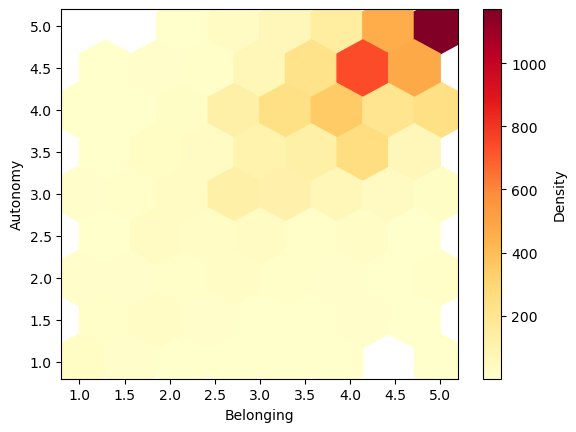

In [178]:
# individual heatmaps to be pasted in Word Document

plt.hexbin(df['Belonging'], df['Autonomy'], gridsize=7, cmap='YlOrRd', mincnt=1)

# Add a colorbar to indicate the density
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel('Belonging')
plt.ylabel('Autonomy')
plt.title('')

# Show the plot
plt.savefig('Belonging-Autonomy.png')
plt.show()

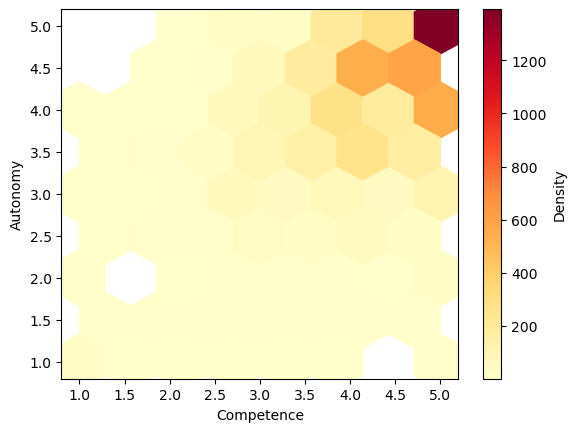

In [179]:
# individual heatmaps to be pasted in Word Document

plt.hexbin(df['Competence'], df['Autonomy'], gridsize=7, cmap='YlOrRd', mincnt=1)

# Add a colorbar to indicate the density
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel('Competence')
plt.ylabel('Autonomy')
plt.title('')

# Show the plot
plt.savefig('Competence-Autonomy.png')
plt.show()

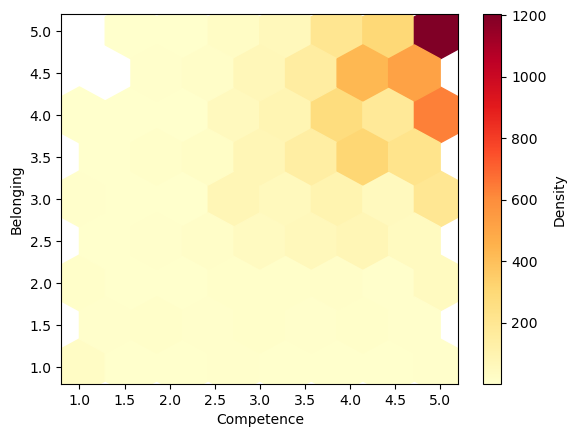

In [180]:
# individual heatmaps to be pasted in Word Document

plt.hexbin(df['Competence'], df['Belonging'], gridsize=7, cmap='YlOrRd', mincnt=1)

# Add a colorbar to indicate the density
plt.colorbar(label='Density')

# Add labels and title
plt.xlabel('Competence')
plt.ylabel('Belonging')
plt.title('')

# Show the plot
plt.savefig('Competence-Belonging.png')
plt.show()

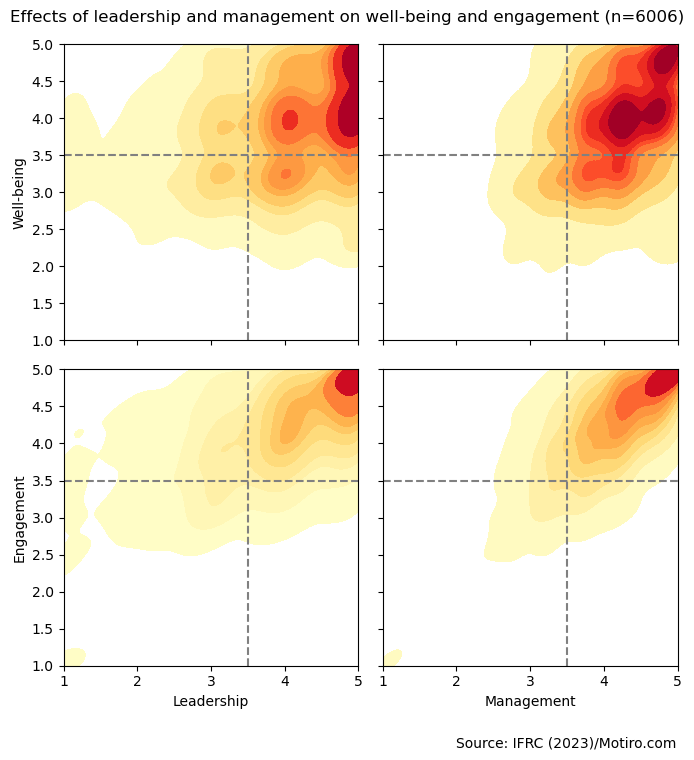

In [80]:
# Combined heatmaps
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL.csv")

# Count the total number of respondents (n)
n = df['Volunteer'].sum() +  df['Staff'].sum()

fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Well-being'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ylabels = ['{:,.2f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax = sns.kdeplot(y=df['Engagement'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ylabels = ['{:,.2f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')


# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'Effects of leadership and management on well-being and engagement (n={n})',
             y=1.02, x=0.5, fontdict={'size': 30})

plt.text(2, -0.1, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 10})

plt.savefig('Lead_Mgt heatmaps.png', bbox_inches='tight', pad_inches=0)
plt.show()

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_1576\530970282.py:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.clustermap(df.corr(),


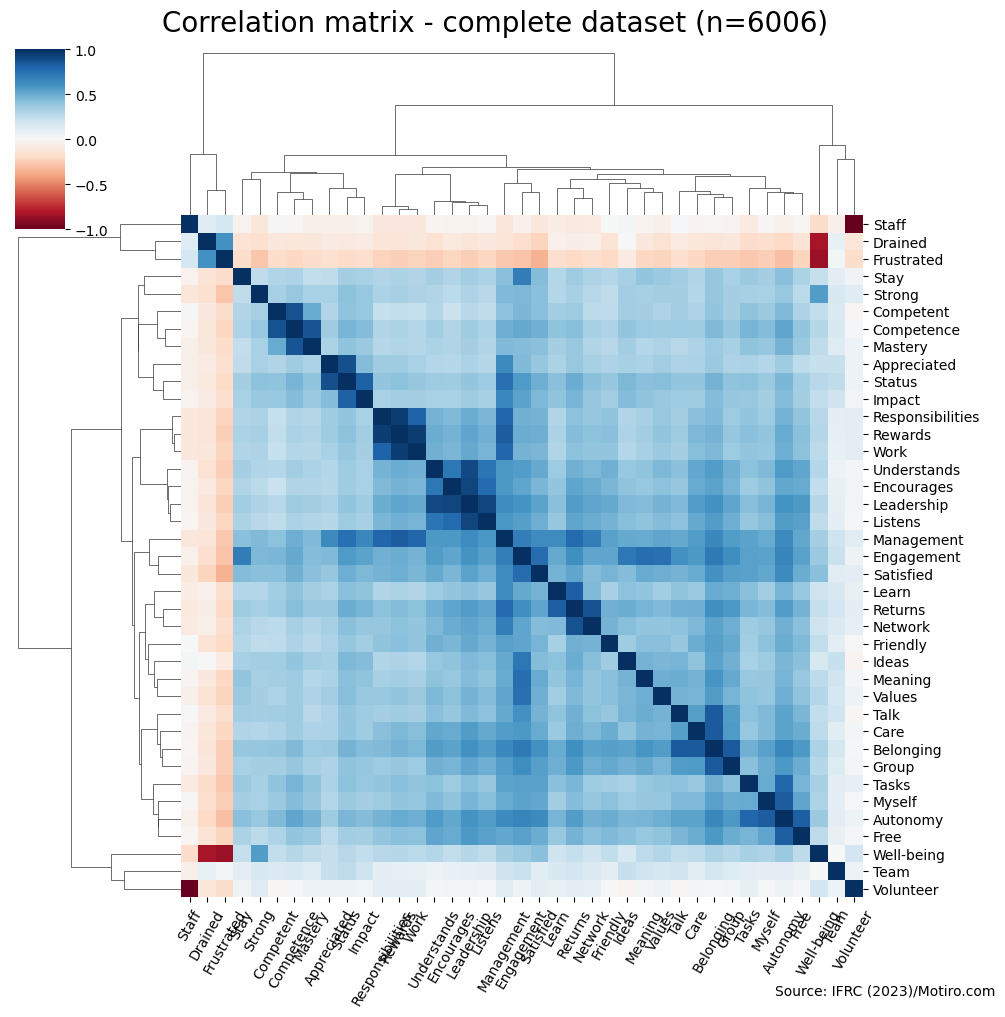

In [28]:
# Correlation matrix with all variables
# select all (default) or un comment filters for staff only or volunteer only.
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum() +  df['Staff'].sum()
#n = df['Volunteer'].sum()
#n = df['Staff'].sum()

# Filter the dataframe for 'Position' = 'Volunteer'

#df = df[df['Position'] == 'Volunteer']

# Filter the dataframe for 'Position' = 'Staff'
#df = df[df['Position'] == 'Staff']

columns = ['Team Name', 'country',
           'Well-being', 'Engagement', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Management', 'Returns',
           'Rewards', 'Status', 'Myself', 'Tasks', 'Free', 'Mastery', 'Competent',
           'Learn', 'Group', 'Talk', 'Care', 'Satisfied', 'Meaning', 'Stay',
           'Ideas', 'Values', 'Understands', 'Encourages', 'Listens','Network',
           'Friendly', 'Team', 'Appreciated', 'Responsibilities', 'Work', 'Impact',
           'Strong', 'Drained','Frustrated',
# Comment volunteer and staff variables if data is filtered.
           'Volunteer', 'Staff']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = False, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

# Adjust the spacing between subplots
#plt.tight_layout()

plt.suptitle(
            f'Correlation matrix - complete dataset (n={n})',
         #  f'Correlation matrix - volunteers (n={n})',
         #  f'Correlation matrix - staff (n={n})',
            y=1.02, x=0.5, size=20)

plt.text(15.2, -9.5, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 10})


# Show the plot
plt.savefig('ALL_Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


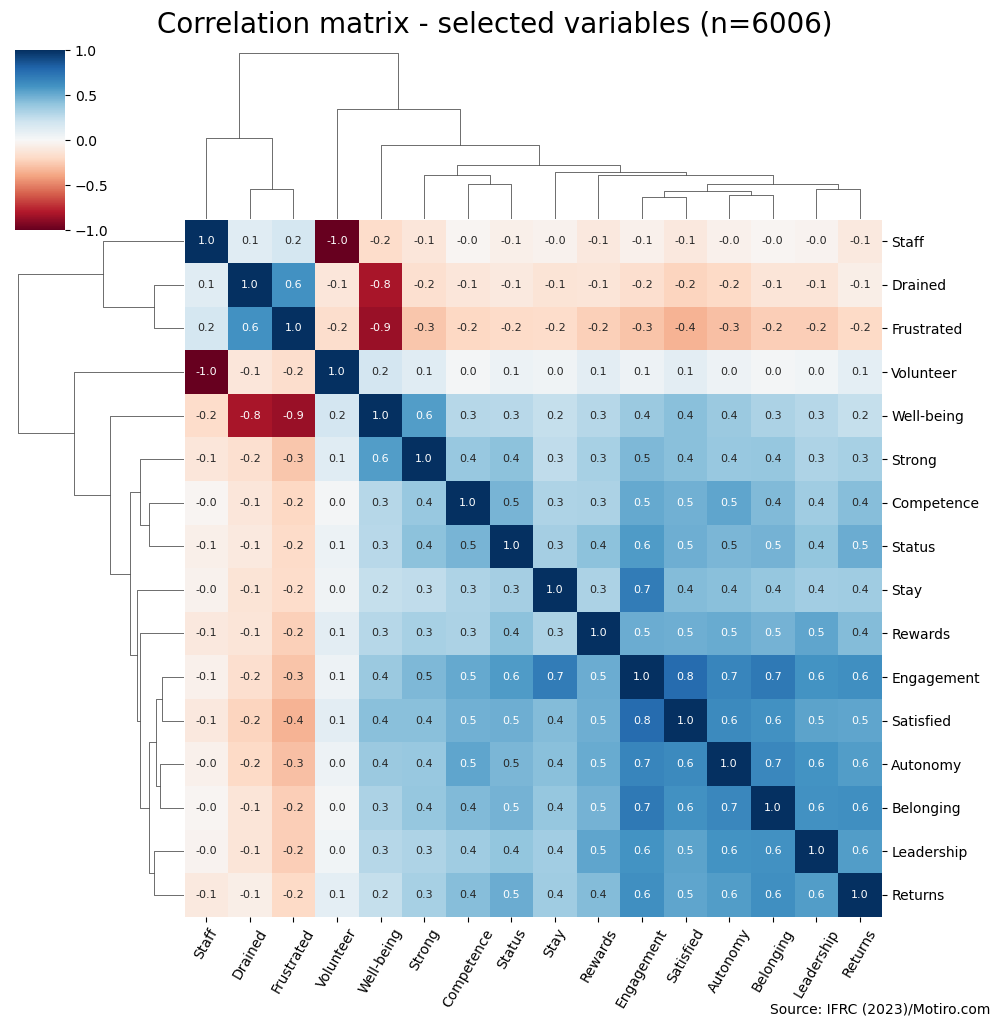

In [31]:
# Summary correlation matrix with grouped scores - All countries
# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Volunteer']

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum() +  df['Staff'].sum()
#n = df['Volunteer'].sum()
#n = df['Staff'].sum()

columns = ['Volunteer',
           'Staff',
           'Well-being',
           'Engagement',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']


# Filter the dataframe for 'Position' = 'Staff'
#df_staff = df[df['Position'] == 'Staff']

# Create the table with the desired columns
df = df[columns]
#df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL.csv")

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

# Adjust the spacing between subplots
#plt.tight_layout()

plt.suptitle(
            f'Correlation matrix - selected variables (n={n})',
         #  f'Correlation matrix - volunteers (n={n})',
         #  f'Correlation matrix - staff (n={n})',
            y=1.02, x=0.5, size=20)

plt.text(15.1, -9.7, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 10})

# Show the plot
plt.savefig('ALL_Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


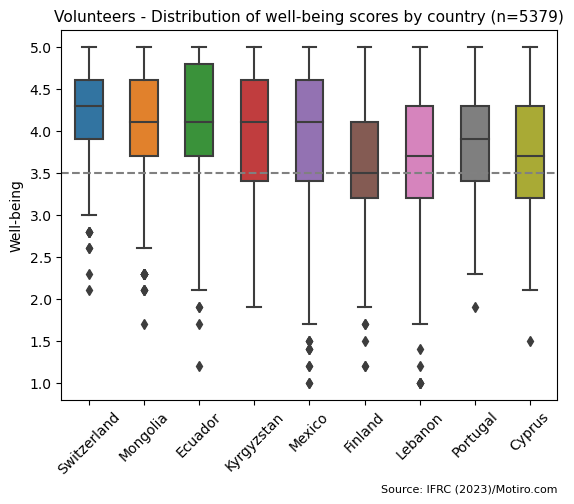

In [48]:
# Box plots to see variance in key dimensions, by country
# Volunteer wellbeing

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
filtered_df = df[df['Position'] == 'Volunteer']

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Filter the DataFrame for teams from selected countries
filtered_df = df[df['country'].isin(['Mexico', 'Finland','Lebanon', 'Kyrgyzstan', 'Cyprus',
                                     'Portugal', 'Switzerland', 'Mongolia', 'Ecuador'])].copy()

bplot=sns.boxplot(y='Well-being', x='country', 
                 data=filtered_df, 
                 width=0.5)

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Set the title
bplot.set_title(f'Volunteers - Distribution of well-being scores by country (n={n})', size=11)

plt.text(5.3, -0.3, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL_Wellbeing_country boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

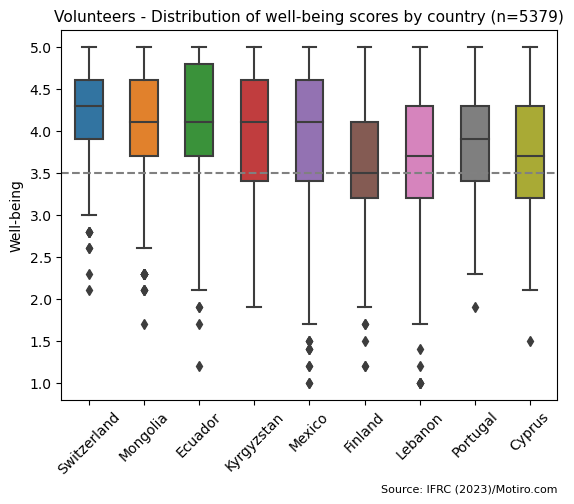

In [ ]:
# Box plots to see variance in key dimensions, by region
# Volunteer wellbeing

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
filtered_df = df[df['Position'] == 'Volunteer']

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Filter the DataFrame for teams from selected countries
filtered_df = df[df['country'].isin(['Mexico', 'Finland','Lebanon', 'Kyrgyzstan', 'Cyprus',
                                     'Portugal', 'Switzerland', 'Mongolia', 'Ecuador'])].copy()

bplot=sns.boxplot(y='Well-being', x='country', 
                 data=filtered_df, 
                 width=0.5)

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Set the title
bplot.set_title(f'Volunteers - Distribution of well-being scores by country (n={n})', size=11)

plt.text(5.3, -0.3, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL_Wellbeing_country boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

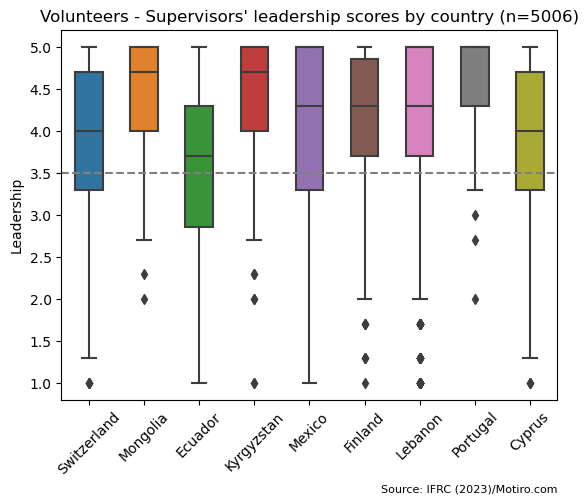

In [50]:
#### Box plots to see variance in key dimensions, by country
# Volunteer - supervisors leadership scores

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland','Lebanon', 'Kyrgyzstan', 'Cyprus',
                                     'Portugal', 'Switzerland', 'Mongolia', 'Ecuador'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum()


bplot=sns.boxplot(y='Leadership', x='country', 
                 data=filtered_df, 
                 width=0.5)

plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

# Set the title
bplot.set_title(f"Volunteers - Supervisors' leadership scores by country (n={n})")

plt.text(5.3, -0.3, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL_Leadership_country boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

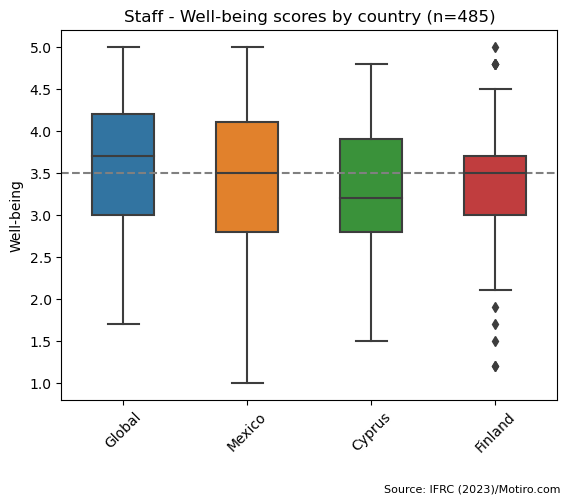

In [59]:
# STAFF Box plots to see variance in key dimensions, by country

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from selected countries'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus', 'Global'])].copy()

# Count the total number of respondents (n)
n = df['Staff'].sum()

bplot=sns.boxplot(y='Well-being', x='country', 
                 data=df, 
                 width=0.5)

plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

# Set the title
bplot.set_title(f'Staff - Well-being scores by country (n={n})')

plt.text(2.1, -0.3, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('STAFF_Wellbeing_country boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

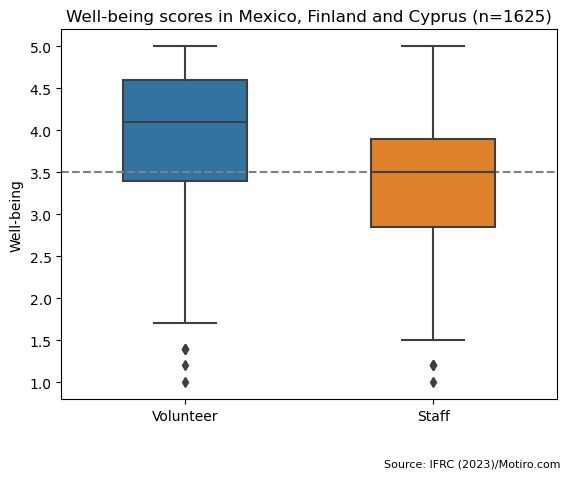

In [66]:
# STAFF and VOLUNTEERS - Box plots to see distribution in well-being scores in key dimensions, by country

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Well-being', x='Position', 
                 data=df, 
                 width=0.5)

# plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

# Set the title
bplot.set_title(f'Well-being scores in Mexico, Finland and Cyprus (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL-STAFF_Wellbeing_boxplot_3countries.png', bbox_inches='tight', pad_inches=0)
plt.show()

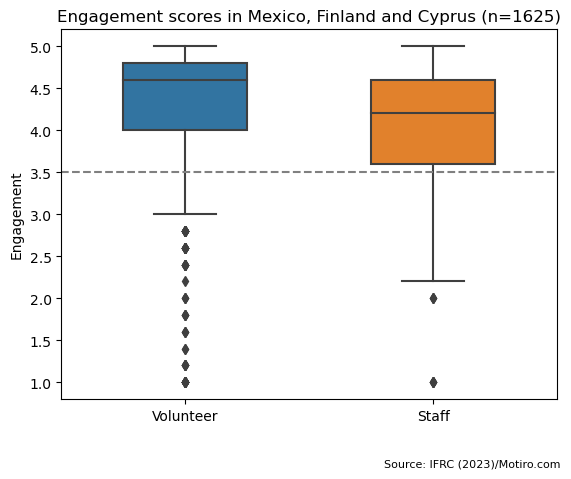

In [82]:
# Box plots to see variance in key dimensions, by country

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Engagement', x='Position', 
                 data=df, 
                 width=0.5)

# plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

# Set the title
bplot.set_title(f'Engagement scores in Mexico, Finland and Cyprus (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL-STAFF_Engagement_boxplot_3countries.png', bbox_inches='tight', pad_inches=0)
plt.show()

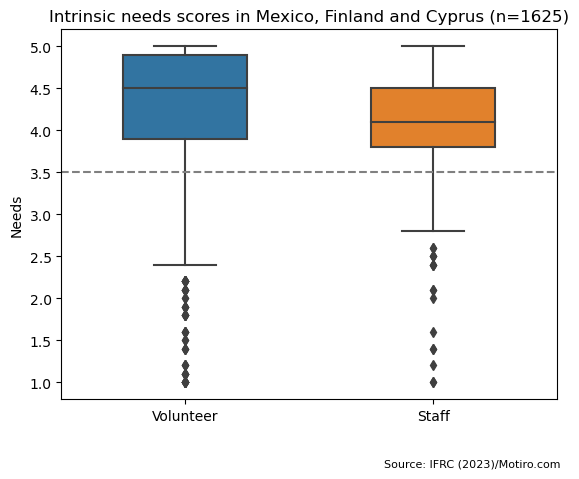

In [81]:
# Box plots to see variance in key dimensions, by country

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Needs', x='Position', 
                 data=df, 
                 width=0.5)

plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

# Set the title
bplot.set_title(f'Intrinsic needs scores in Mexico, Finland and Cyprus (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL-STAFF_Needs_boxplot_3countries.png', bbox_inches='tight', pad_inches=0)
plt.show()

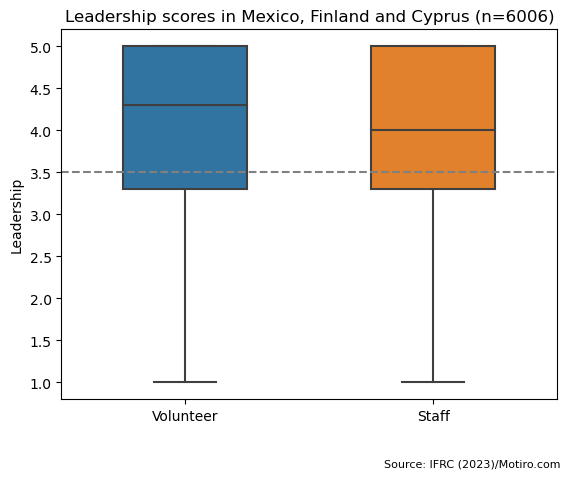

In [83]:
# Box plots to see variance in key dimensions, by countr

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Leadership', x='Position', 
                 data=df, 
                 width=0.5)

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

plt.xlabel('')

# Set the title
bplot.set_title(f'Leadership scores in Mexico, Finland and Cyprus (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL-STAFF_Leadership_boxplot_3countries.png', bbox_inches='tight', pad_inches=0)
plt.show()

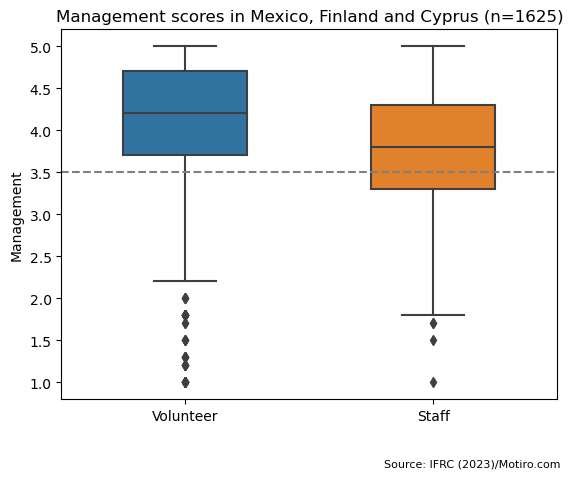

In [87]:
# Box plots to see variance in key dimensions, by country

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/uungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Management', x='Position', 
                 data=df, 
                 width=0.5)


# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')

plt.xlabel('')

# Set the title
bplot.set_title(f'Management scores in Mexico, Finland and Cyprus (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('VOL-STAFF_Management_boxplot_3countries.png', bbox_inches='tight', pad_inches=0)
plt.show()

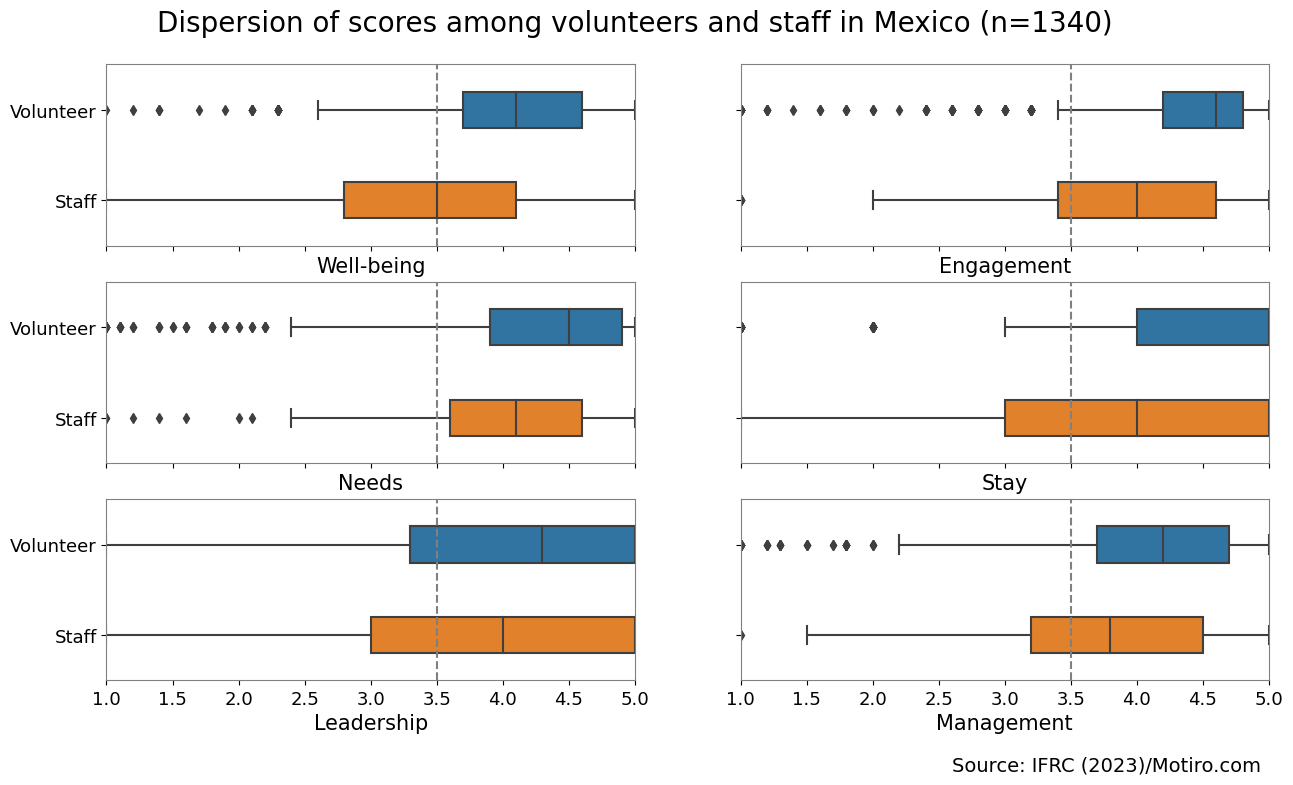

In [56]:
# MEXICO Box plots to see dispersion in key dimensions

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Specify the x-axis and y-axis variables for each plot
variables = [
    ('Position', 'Well-being'),
    ('Position', 'Engagement'),
    ('Position', 'Needs'),
    ('Position', 'Stay'),
    ('Position', 'Leadership'),
    ('Position', 'Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Mexico'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

for i, (x_var, y_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    bplot=sns.boxplot(y=x_var, x=y_var, 
                 data=df, 
                 width=0.4,
                 ax=ax)
    bplot.set(ylabel=None)
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.set_xlabel(y_var, fontsize=15, x=0.5, y=100)
    ax.tick_params(axis='both', labelsize=13)
    ax.spines['bottom'].set_color('gray')
    ax.spines['top'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.spines['left'].set_color('gray')
    #set margin
    ax.margins(x=0, y=23)

# Set the title
ax.set_title(f'Dispersion of scores among volunteers and staff in Mexico (n={n})',
pad=50, y=3.2, x=-0.2, fontdict={'size': 20})

plt.text(2.6, 2.5, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 14})

# Save and show the plot
plt.savefig('VOL-STAFF_combined Mexico boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

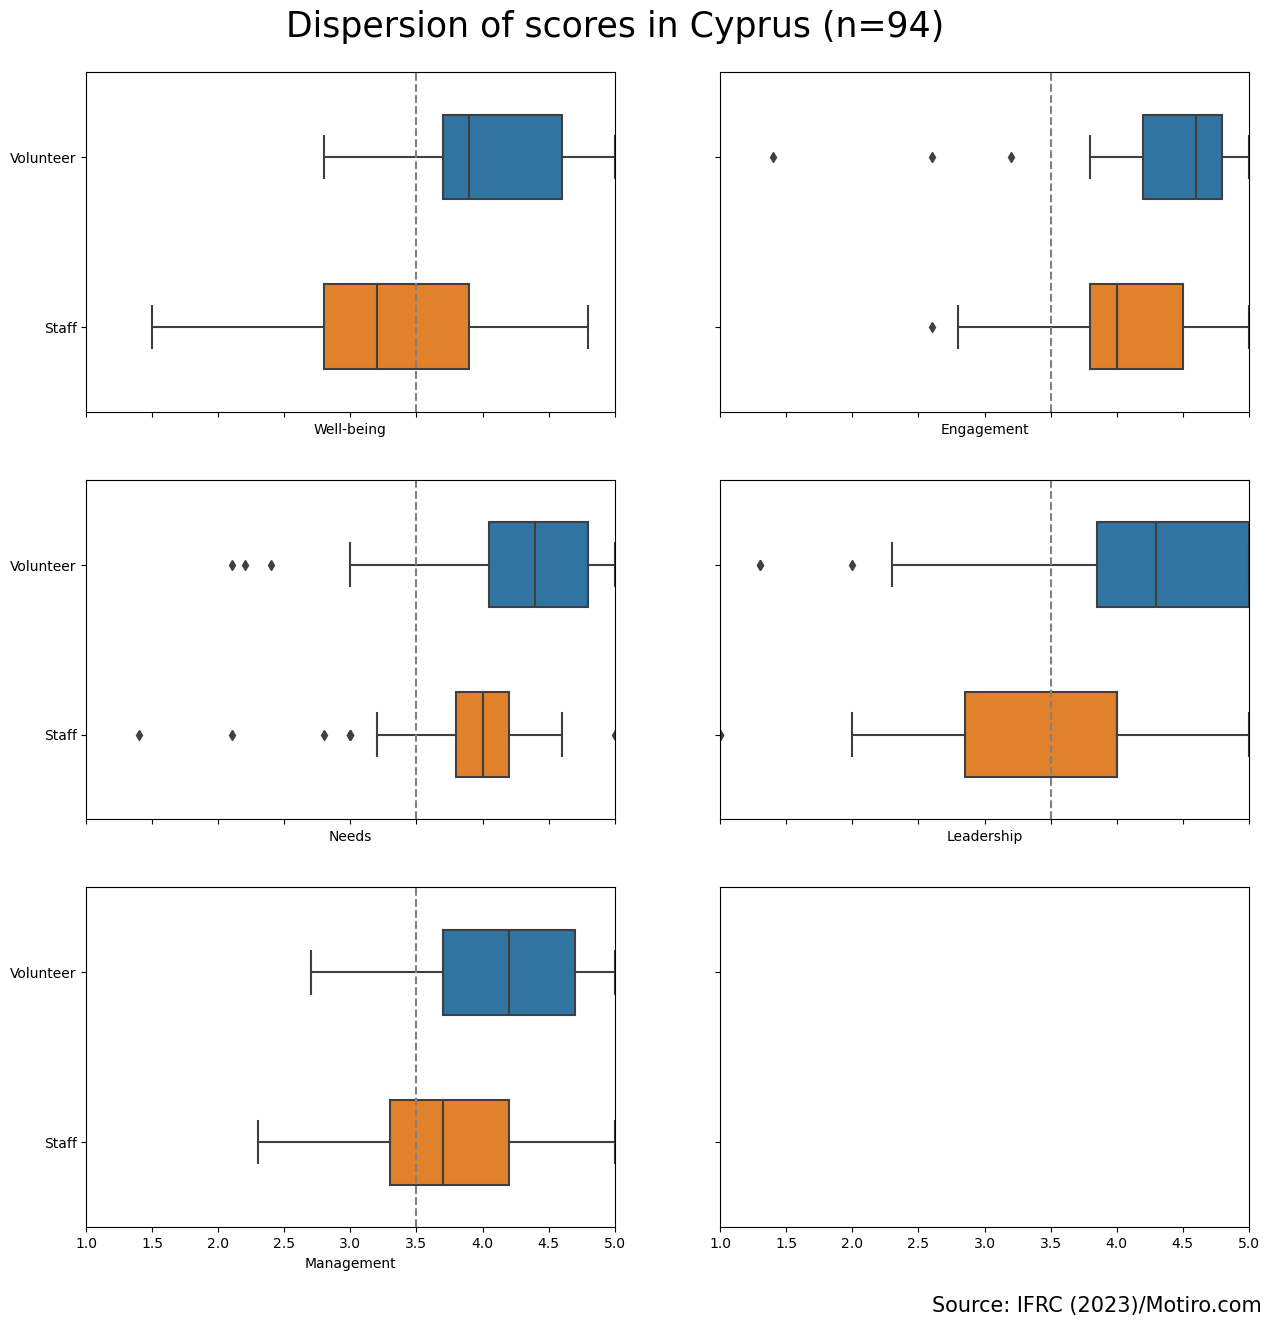

In [102]:
# Box plots to see dispersion in key dimensions, by country

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Specify the x-axis and y-axis variables for each plot
variables = [
    ('Position', 'Well-being'),
    ('Position', 'Engagement'),
    ('Position', 'Needs'),
    ('Position', 'Leadership'),
    ('Position', 'Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from Cyprus
df = df[df['country'].isin(['Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

for i, (x_var, y_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    bplot=sns.boxplot(y=x_var, x=y_var, 
                 data=df, 
                 width=0.5,
                 ax=ax)
    bplot.set(ylabel=None) 

    #set margin
    ax.margins(x=0, y=20)
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')

# Set the title
ax.set_title(f'Dispersion of scores in Cyprus (n={n})', pad=50, y=3.3, x=1, fontdict={'size': 25})

plt.text(2.6, 2, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 15})

# Save and show the plot
plt.savefig('VOL-STAFF_combined Cyprus boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

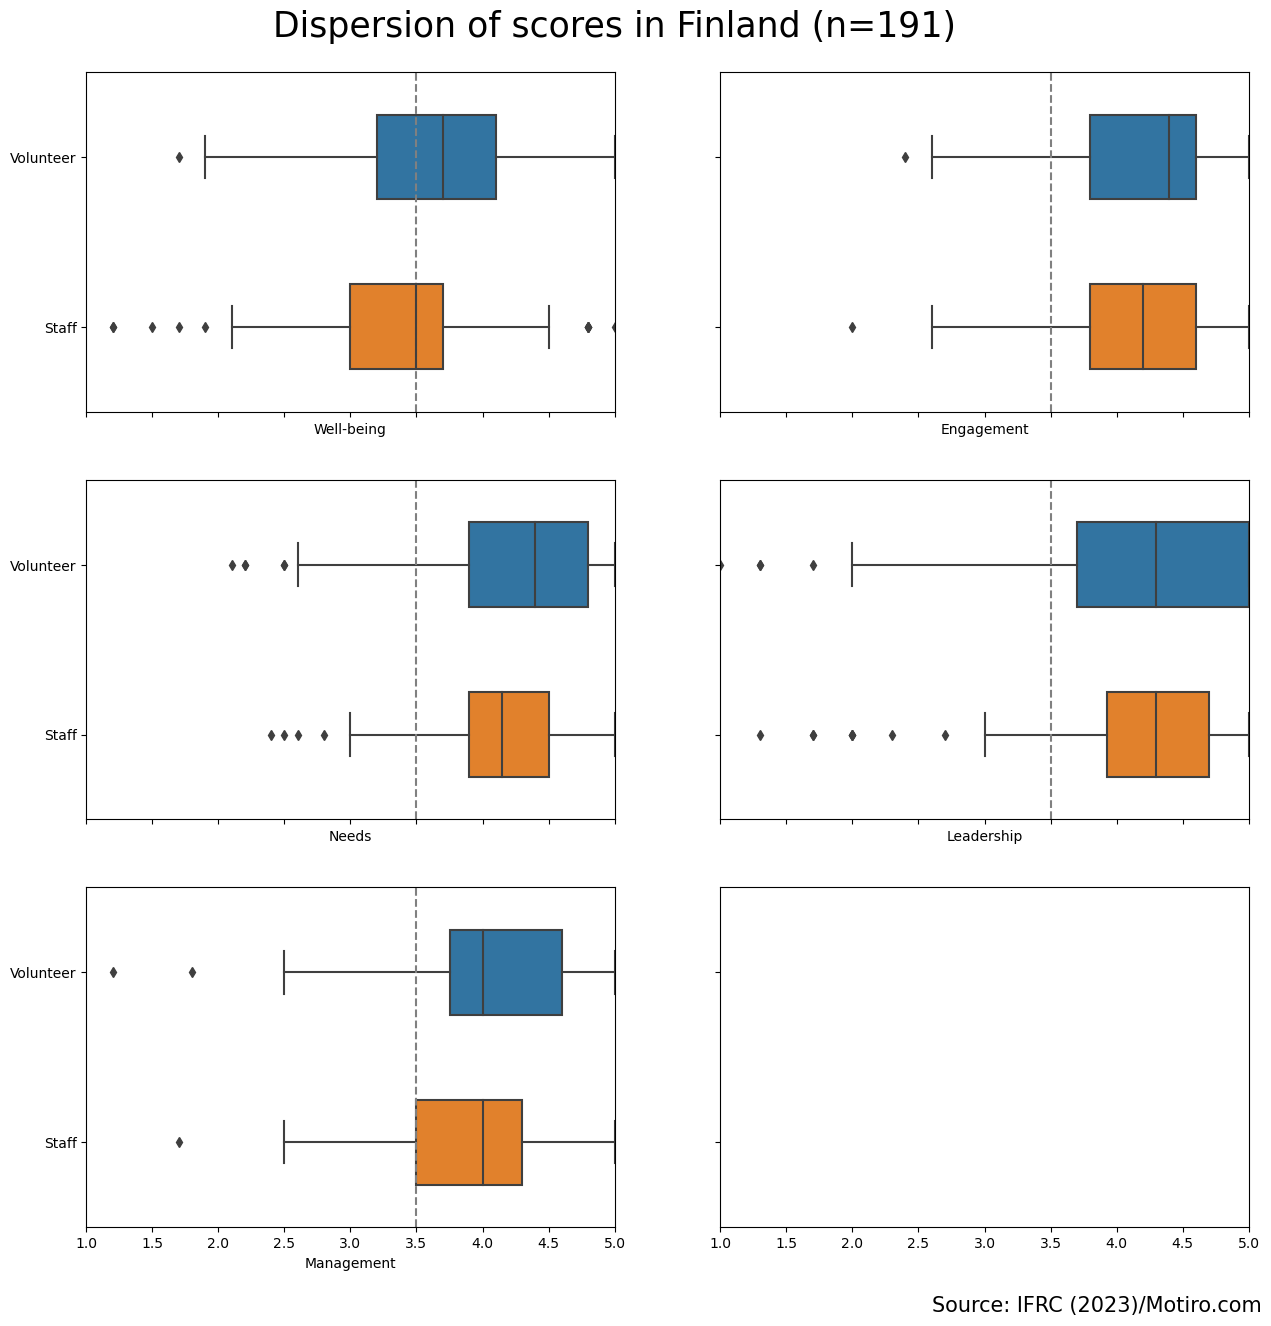

In [104]:
# Box plots to see dispersion in key dimensions, FINLAND

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Specify the x-axis and y-axis variables for each plot
variables = [
    ('Position', 'Well-being'),
    ('Position', 'Engagement'),
    ('Position', 'Needs'),
    ('Position', 'Leadership'),
    ('Position', 'Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Finland'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

for i, (x_var, y_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    bplot=sns.boxplot(y=x_var, x=y_var, 
                 data=df, 
                 width=0.5,
                 ax=ax)
    bplot.set(ylabel=None) 
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')

    #set margin
    ax.margins(x=0, y=20)

# Set the title
#bplot.set_title('Dispersion of scores in Mexico')
#plt.suptitle('Dispersion of scores in Mexico', fontdict={'size': 100})
ax.set_title(f'Dispersion of scores in Finland (n={n})', pad=50, y=3.3, x=1, fontdict={'size': 25})

plt.text(2.6, 2, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 15})

# Save and show the plot
plt.savefig('VOL-STAFF_combined Finland boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

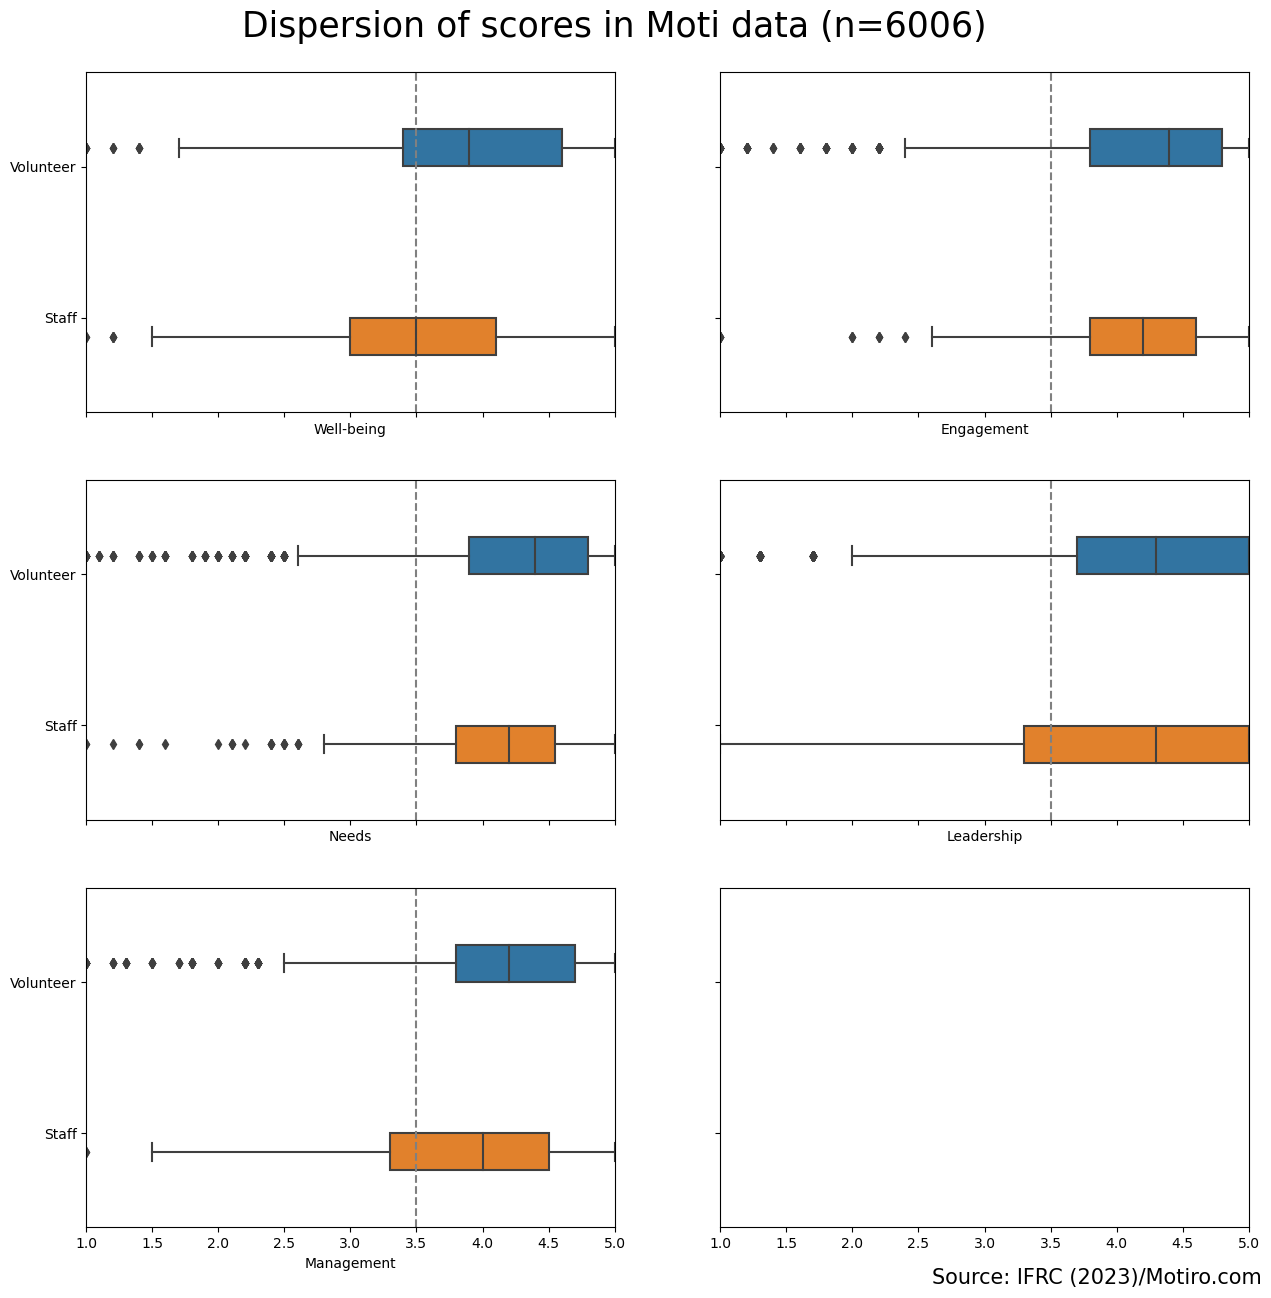

In [105]:
# Box plots to see dispersion in key dimensions, complete Moti dataset (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Specify the x-axis and y-axis variables for each plot
variables = [
    ('Position', 'Well-being'),
    ('Position', 'Engagement'),
    ('Position', 'Needs'),
    ('Position', 'Leadership'),
    ('Position', 'Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

for i, (x_var, y_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    bplot=sns.boxplot(y=x_var, x=y_var, 
                 data=df, 
                 hue='Position',
                 width=0.5,
                 ax=ax)
    bplot.set(ylabel=None)
    bplot.get_legend().remove()
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')

#set margin
    ax.margins(x=0, y=20)

# Set the title
ax.set_title(f'Dispersion of scores in Moti data (n={n})', pad=50, y=3.3, x=1, fontdict={'size': 25})

plt.text(2.6, 2, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 15})

# Save and show the plot
plt.savefig('VOL-STAFF_combined_Everyone_boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

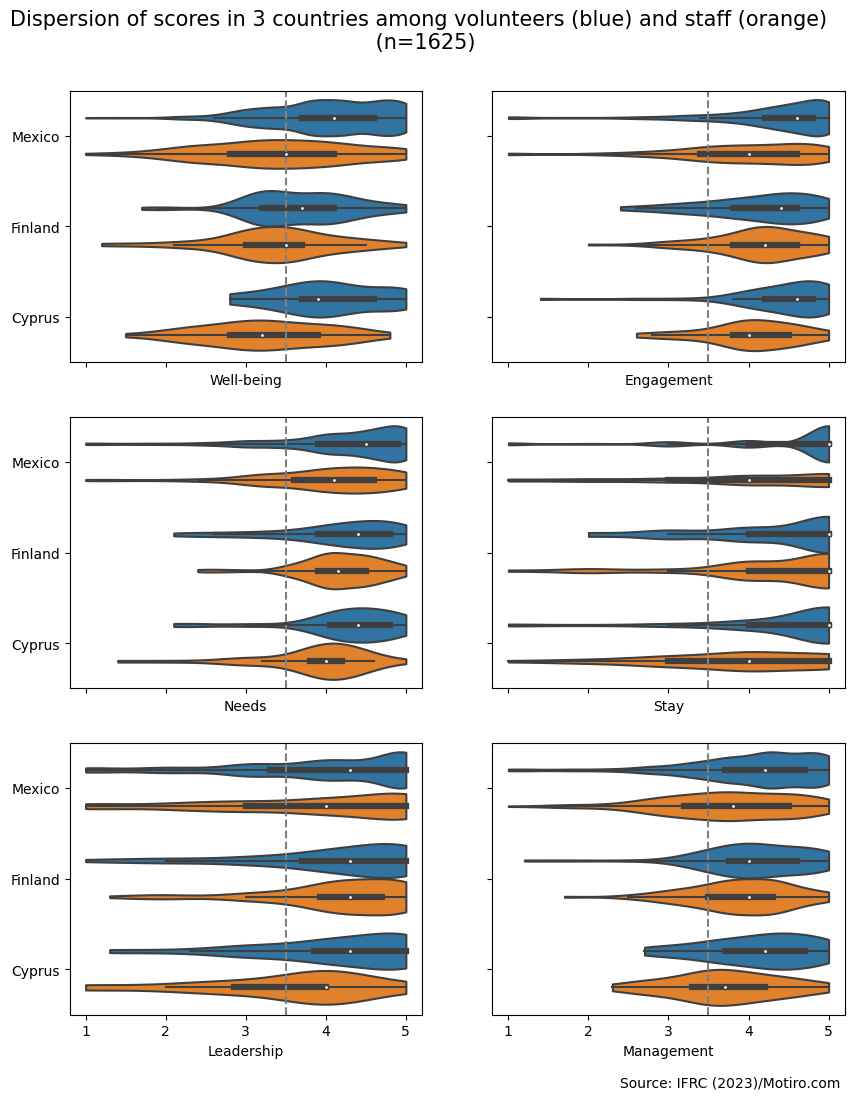

In [65]:
# Box plots to see dispersion in key dimensions, 3 countries (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the DataFrame for teams from 'Mexico', 'Cyprus and Finland'
df = df[df['country'].isin(['Finland', 'Mexico', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Specify the x-axis variables for each plot
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Stay'),
    ('Leadership'),
    ('Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    sns.violinplot(
    data=df, x=x_var, y='country', hue="Position", kind="violin", legend=None, cut=0, ax=ax)
    plt.ylabel('')
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.set(ylabel=None)
    ax.get_legend().remove()

ax.set_title(f'Dispersion of scores in 3 countries among volunteers (blue) and staff (orange) \n (n={n})', pad=50, y=3.3, x=-0.2, size=15)
plt.text(2.4, 3.3, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 10})

# Save and show the plot
plt.savefig('VOL-STAFF_combined_violin_3countries 2x3.png', bbox_inches='tight', pad_inches=0)
plt.show()

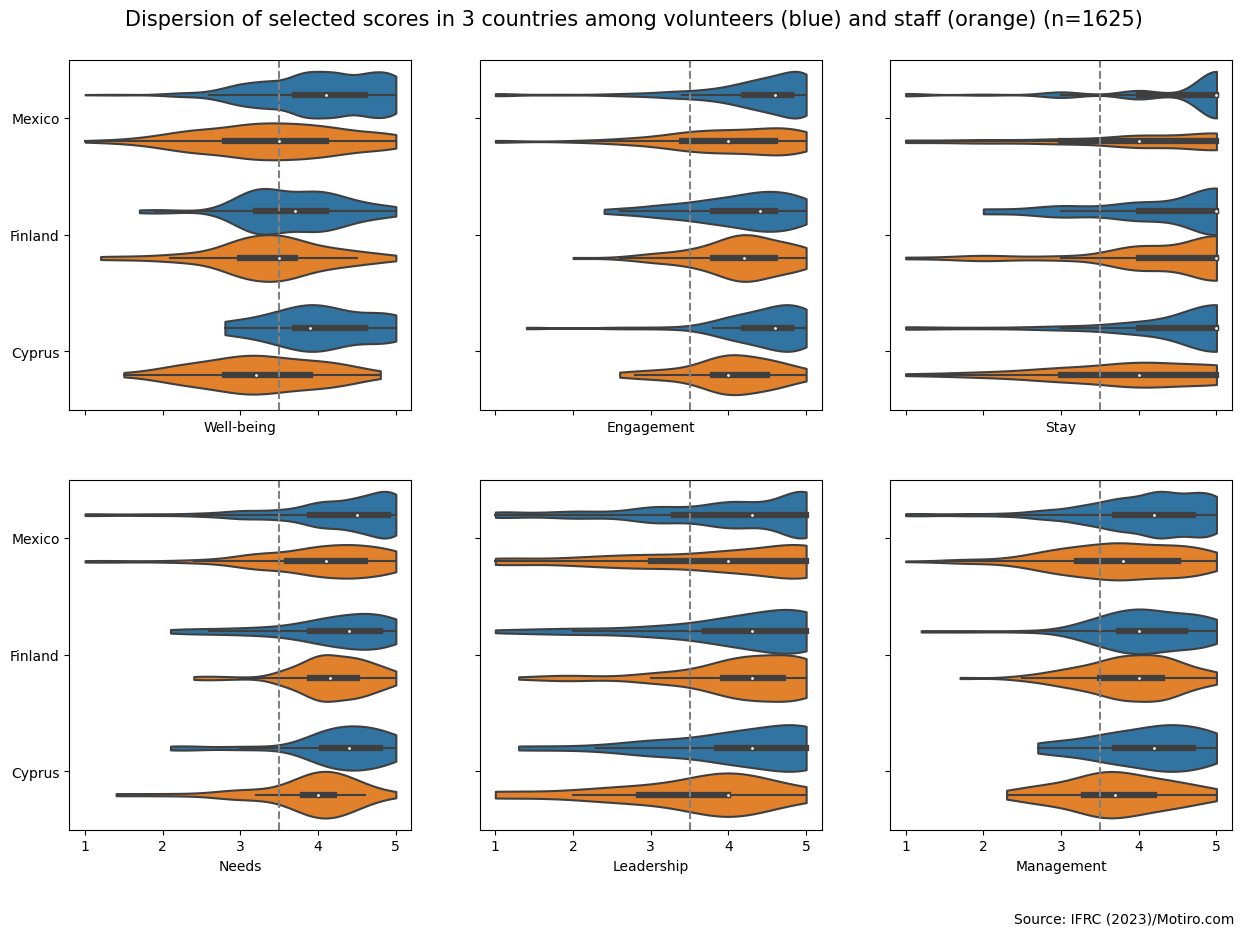

In [78]:
# Box plots to see dispersion in key dimensions, 3 countries (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the DataFrame for teams from 'Mexico', 'Cyprus and Finland'
df = df[df['country'].isin(['Finland', 'Mexico', 'Cyprus'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Specify the x-axis variables for each plot
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Stay'),
    ('Needs'),
    ('Leadership'),
    ('Management')
    ]

# Create a 2x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    sns.violinplot(
    data=df, x=x_var, y='country', hue="Position", kind="violin", legend=None, cut=0, ax=ax)
    plt.ylabel('')
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.set(ylabel=None)
    ax.get_legend().remove()

ax.set_title(f'Dispersion of selected scores in 3 countries among volunteers (blue) and staff (orange) (n={n})', pad=50, x=-0.75, y=2.1, size=15)
plt.text(2.4, 3.3, "Source: IFRC (2023)/Motiro.com", fontdict={'size': 10})

# Save and show the plot
plt.savefig('VOL-STAFF_combined_violin_3countries 2x3.png', bbox_inches='tight', pad_inches=0)
plt.show()

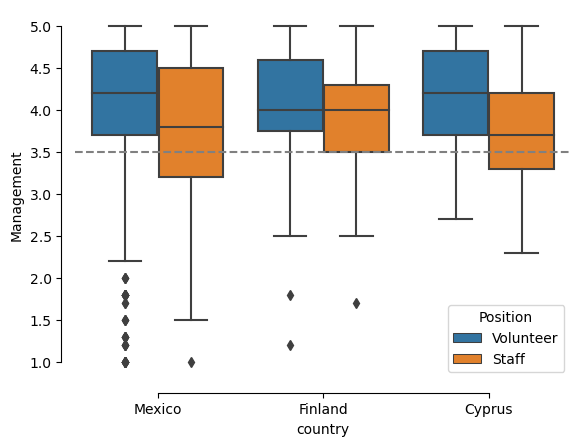

In [78]:
# Box plots to see dispersion in key dimensions, complete Moti dataset (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the DataFrame for teams from 'Mexico' and 'Lebanon'
df = df[df['country'].isin(['Cyprus', 'Finland', 'Mexico'])].copy()

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="country", y="Management",
            hue="Position",
            data=df)
sns.despine(offset=10, trim=True)
# Add vertical line to represent cut off values
plt.axhline(y=3.5, color='gray', linestyle='--')


# Set the title
#bplot.set_title('Dispersion of scores in Mexico')
#plt.suptitle('Dispersion of scores in Mexico', fontdict={'size': 100})
ax.set_title('Dispersion of scores in Moti data', pad=50, y=3.3, x=1, fontdict={'size': 25})

# Save and show the plot
plt.savefig('VOL-STAFF_combined_Management_grouped_boxplots.png', bbox_inches='tight', pad_inches=0)
plt.show()

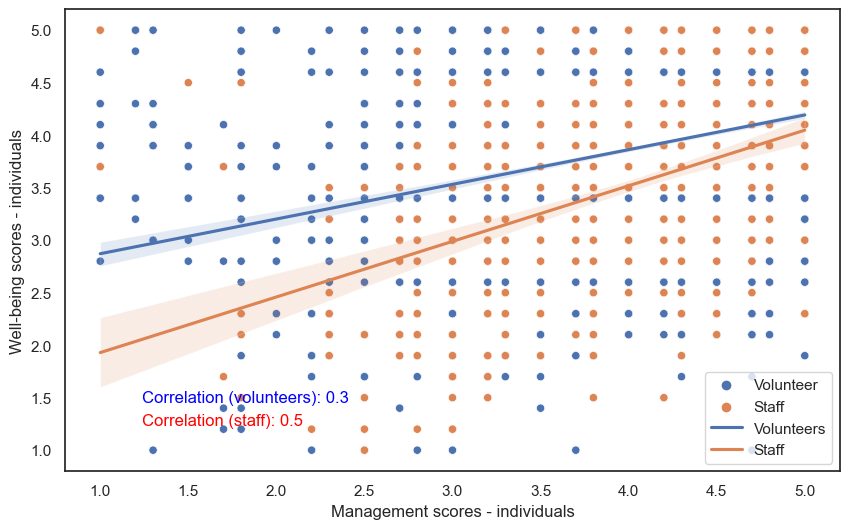

In [87]:
# Scatter plot to see correlations in key dimensions @ individual level, complete Moti dataset (everyone)
sns.set(style="white")

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Create the bubble graph
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Management', y='Well-being', hue='Position', sizes=(50, 500))

# Add trend lines for 'Volunteer' and 'Staff'
volunteer_data = df[df['Volunteer'] == 1]
staff_data = df[df['Staff'] == 1]

sns.regplot(data=volunteer_data, x='Management', y='Well-being', scatter=False, label='Volunteers')
sns.regplot(data=staff_data, x='Management', y='Well-being', scatter=False, label='Staff')

# Drop rows with missing or invalid values
volunteer_data = volunteer_data.dropna(subset=['Management', 'Well-being'])
staff_data = staff_data.dropna(subset=['Management', 'Well-being'])

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(volunteer_data['Management'], volunteer_data['Well-being'])[0]
staff_corr = pearsonr(staff_data['Management'], staff_data['Well-being'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.1, 0.15, f'Correlation (volunteers): {volunteer_corr:.1f}', color='blue', transform=plt.gca().transAxes)
plt.text(0.1, 0.10, f'Correlation (staff): {staff_corr:.1f}', color='red', transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel("Management scores - individuals")
plt.ylabel('Well-being scores - individuals')
# plt.title('Well-being is colosely correlated with management culture')

# Show the legend
plt.legend(loc = "lower right")

# Save and show the plot
plt.savefig('VOL-STAFF_corr_Managemt-Wellbeing.png', bbox_inches='tight', pad_inches=0)
plt.show()

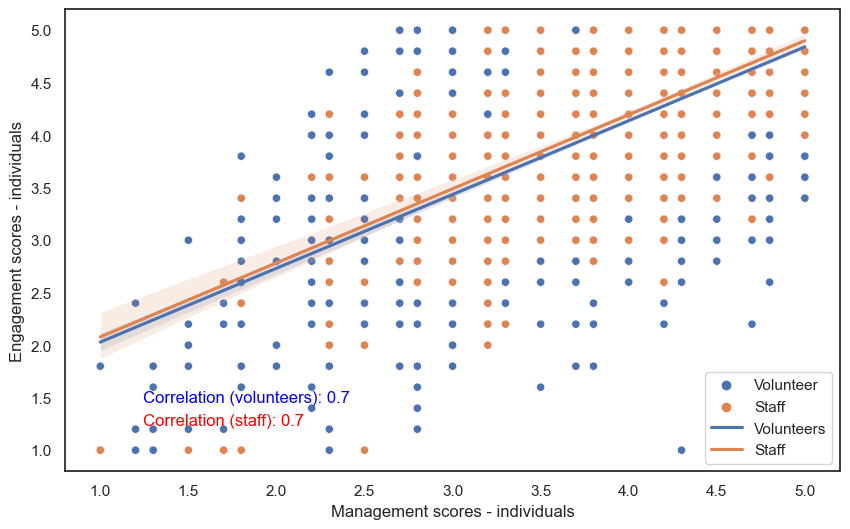

In [3]:

# Scatter plot to see correlations in key dimensions @ individual level, complete Moti dataset (everyone)
sns.set(style="white")

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Create the bubble graph
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Management', y='Engagement', hue='Position',
                sizes=())

# Add trend lines for 'Volunteer' and 'Staff'
volunteer_data = df[df['Volunteer'] == 1]
staff_data = df[df['Staff'] == 1]

sns.regplot(data=volunteer_data, x='Management', y='Engagement', scatter=False, label='Volunteers')
sns.regplot(data=staff_data, x='Management', y='Engagement', scatter=False, label='Staff')

# Drop rows with missing or invalid values
volunteer_data = volunteer_data.dropna(subset=['Management', 'Engagement'])
staff_data = staff_data.dropna(subset=['Management', 'Engagement'])

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(volunteer_data['Management'], volunteer_data['Engagement'])[0]
staff_corr = pearsonr(staff_data['Management'], staff_data['Engagement'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.1, 0.15, f'Correlation (volunteers): {volunteer_corr:.1f}', color='blue', transform=plt.gca().transAxes)
plt.text(0.1, 0.10, f'Correlation (staff): {staff_corr:.1f}', color='red', transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel("Management scores - individuals")
plt.ylabel('Engagement scores - individuals')
# plt.title('Well-being is colosely correlated with management culture')

# Show the legend
plt.legend(loc = "lower right")

# Save and show the plot
plt.savefig('VOL-STAFF_corr_Managemt-Engagement.png', bbox_inches='tight', pad_inches=0)
plt.show()

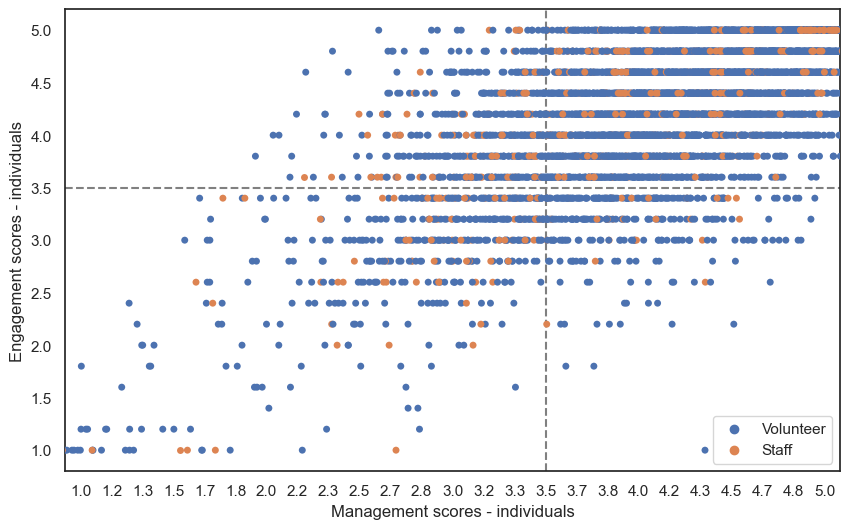

In [14]:

# Scatter plot to see correlations in key dimensions @ individual level, complete Moti dataset (everyone)
# using strip plot to avoid overplotting. Treats scores as categorical

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Create the bubble graph
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Management', y='Engagement', hue='Position',
                jitter=2, dodge=True, legend='auto',
                size=(5))

# Add trend lines for 'Volunteer' and 'Staff'
volunteer_data = df[df['Volunteer'] == 1]
staff_data = df[df['Staff'] == 1]

#sns.regplot(data=volunteer_data, x='Management', y='Engagement', scatter=False, label='Volunteers')
#sns.regplot(data=staff_data, x='Management', y='Engagement', scatter=False, label='Staff')

# Drop rows with missing or invalid values
volunteer_data = volunteer_data.dropna(subset=['Management', 'Engagement'])
staff_data = staff_data.dropna(subset=['Management', 'Engagement'])

# Calculate and display correlation coefficients
#volunteer_corr = pearsonr(volunteer_data['Management'], volunteer_data['Engagement'])[0]
#staff_corr = pearsonr(staff_data['Management'], staff_data['Engagement'])[0]

# Add correlation coefficient labels within the plot area
#plt.text(0.1, 0.15, f'Correlation (volunteers): {volunteer_corr:.1f}', color='blue', transform=plt.gca().transAxes)
#plt.text(0.1, 0.10, f'Correlation (staff): {staff_corr:.1f}', color='red', transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel("Management scores - individuals")
plt.ylabel('Engagement scores - individuals')
# plt.title('Well-being is colosely correlated with management culture')

# Show the legend
plt.legend(loc = "lower right")

# Add the vertical and horizontal lines to represent cut off values
plt.axvline(x='3.5', color='gray', linestyle='--')
plt.axhline(y=3.5, color='gray', linestyle='--')

# Save and show the plot
plt.savefig('VOL-STAFF_corr_jitter_Managemt-Engagement.png', bbox_inches='tight', pad_inches=0)
plt.show()

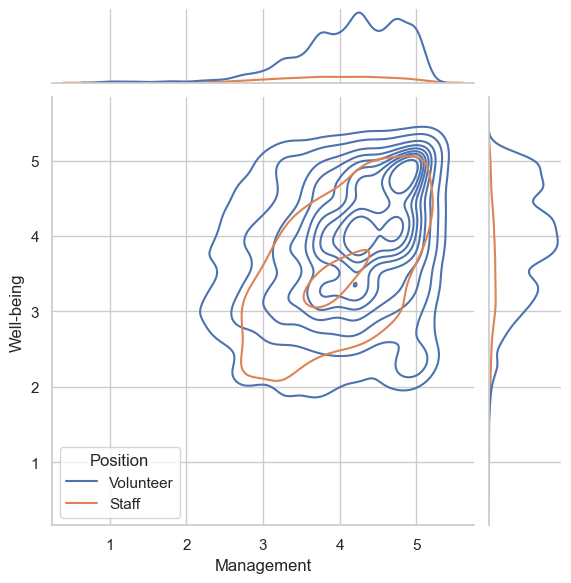

In [66]:

#Joint plot to see correlations in key dimensions @ individual level, complete Moti dataset (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")
sns.set_theme(style="ticks")
sns.set(style="whitegrid")

g = sns.jointplot(
    data=df,
    x="Management", y="Well-being", hue="Position",
    kind="kde",
)

# Position the legend
#plt.legend(loc ='lower left')
# move the legend in ax_joint
sns.move_legend(g.ax_joint, "lower left", title='Position', frameon=Tr)

# Save and show the plot
plt.savefig('VOL-STAFF_joint_corr_Managemt-Wellbeing.png')
plt.show()

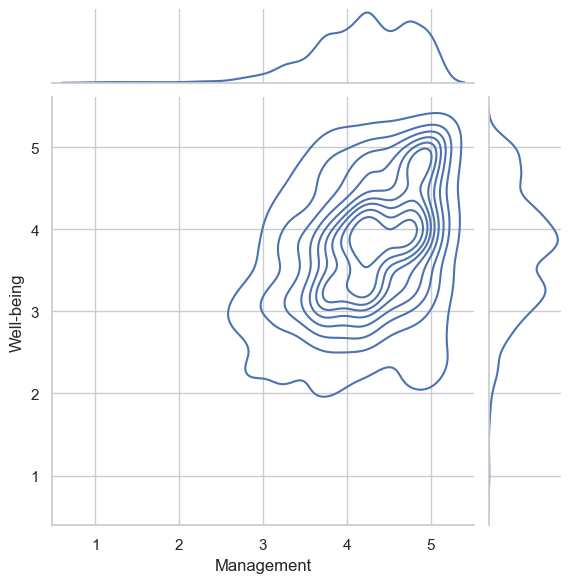

In [51]:

#Joint plot to see correlations in key dimensions @ individual level, LEBANESE dataset (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'country' = 'Lebanon'
df = df[df['country'] == 'Lebanon']

sns.set_theme(style="ticks")
sns.set(style="whitegrid")

g = sns.jointplot(data=df, x="Management", y="Well-being", kind="kde")

# Save and show the plot
plt.savefig('LRC_joint_corr_Managemt-Wellbeing.png')
plt.show()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 2583 to 5195
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         2098 non-null   object 
 1   country           2098 non-null   object 
 2   Well-being        2098 non-null   float64
 3   Needs             2098 non-null   float64
 4   Engagement        2098 non-null   float64
 5   Autonomy          2098 non-null   float64
 6   Belonging         2098 non-null   float64
 7   Competence        2098 non-null   float64
 8   Leadership        2098 non-null   float64
 9   Management        2098 non-null   float64
 10  Returns           2098 non-null   float64
 11  Rewards           2098 non-null   float64
 12  Status            2098 non-null   float64
 13  Myself            2098 non-null   int64  
 14  Tasks             2098 non-null   int64  
 15  Free              2098 non-null   int64  
 16  Mastery           2098 non-null   int64

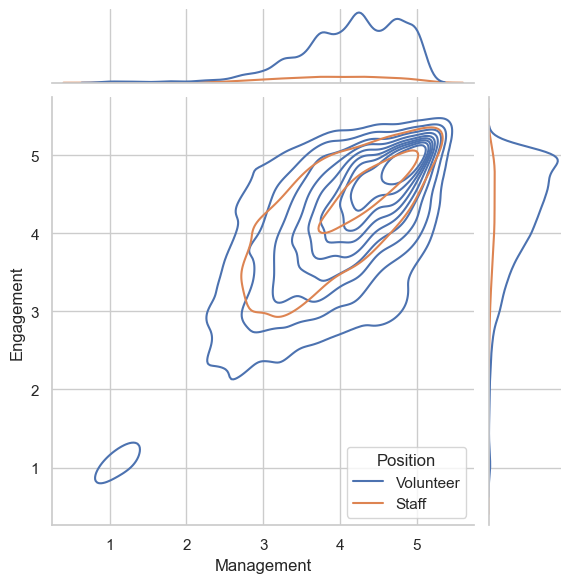

In [67]:
#Joint plot to see correlations in key dimensions @ individual level, complete Moti dataset (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")
sns.set_theme(style="ticks")
sns.set(style="whitegrid")

g = sns.jointplot(
    data=df,
    x="Management", y="Engagement", hue="Position",
    kind="kde",
)

# Position the legend
#plt.legend(loc ='lower left')
# move the legend in ax_joint
sns.move_legend(g.ax_joint, "lower right", title='Position', frameon=True)

# Save and show the plot
plt.savefig('VOL-STAFF_joint_corr_Managemt-Engagement.png')
plt.show()

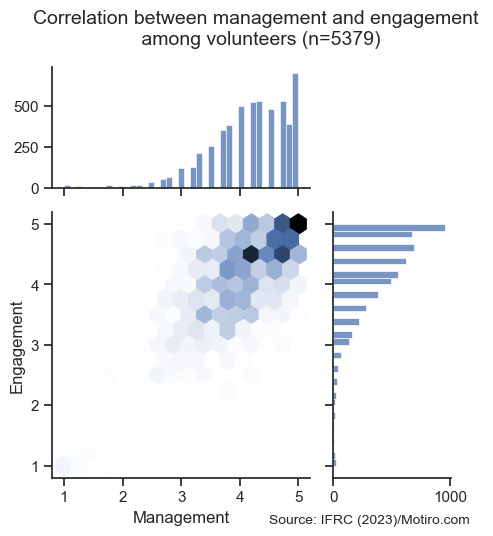

In [91]:
#Joint plot to see distributions in key dimensions @ individual level, complete Moti dataset (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")
sns.set_theme(style="ticks")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

rs = np.random.RandomState(11)
x = df['Management']
y = df['Engagement']

sns.jointplot(x=x, y=y, kind="hex", height=5, ratio=2, marginal_ticks=True, gridsize=15)

plt.title(f'Correlation between management and engagement \n among volunteers (n={n})', x=0.8, y=1.6, size=14)
plt.text(4.5, 0.05, "Source: IFRC (2023)/Motiro.com", size=10)

# Save and show the plot
plt.savefig('VOL_joint_dist_Managemt-Engagement.png')
plt.show()

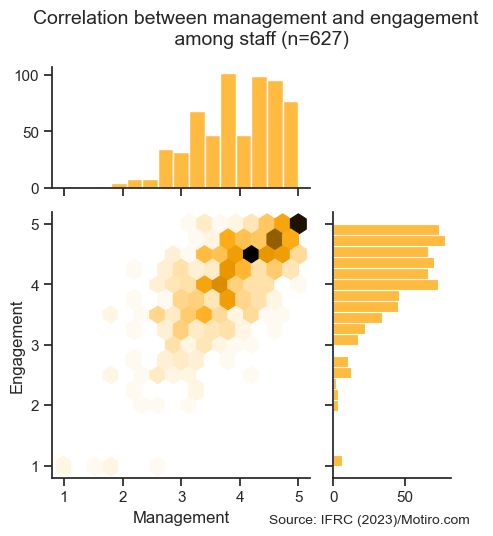

In [92]:
#Joint plot to see distributions in key dimensions @ individual level, complete Moti dataset (everyone)

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")
sns.set_theme(style="ticks")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Staff']

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

rs = np.random.RandomState(11)
x = df['Management']
y = df['Engagement']

sns.jointplot(x=x, y=y, kind="hex", color='orange', height=5, ratio=2, marginal_ticks=True, gridsize=15)

plt.title(f'Correlation between management and engagement \n among staff (n={n})', x=0.8, y=1.6, size=14)
plt.text(4.5, 0.05, "Source: IFRC (2023)/Motiro.com", size=10)

# Save and show the plot
plt.savefig('STAFF_joint_dist_Managemt-Engagement.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


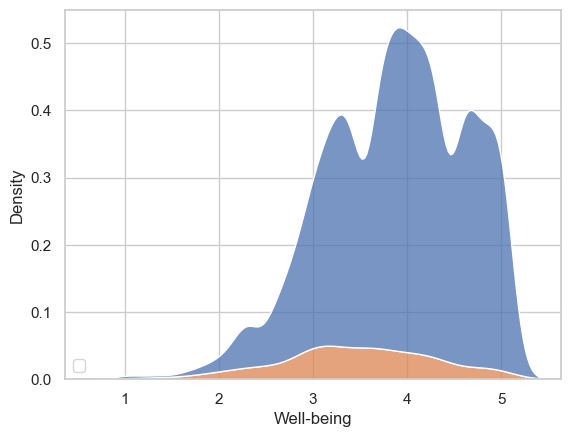

In [68]:
#Joint plot to see distributions in key dimensions @ individual level, complete Moti dataset (everyone)
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

sns.kdeplot(data=df, x="Well-being", hue="Position", multiple="stack")

plt.legend(loc ='lower left')
#sns.move_legend(g.ax_joint, "upper left", title='Position')

# Save and show the plot
plt.savefig('VOL-STAFF_Wellbeing.png')
plt.show()

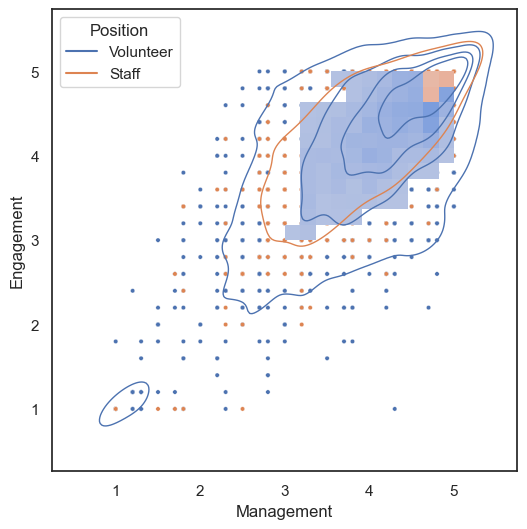

<Figure size 640x480 with 0 Axes>

In [163]:
#sns.light_palette("#79C")
#sns.set_theme(style="white")
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=df, x="Management", y="Engagement", hue='Position', s=10, color=".30")
sns.histplot(data=df, x="Management", y="Engagement", hue='Position', bins=22, pthresh=.1, cmap="mako")
sns.kdeplot(data=df, x="Management", y="Engagement", hue='Position', levels=5, color="b", linewidths=1)

plt.show()
plt.savefig('VOL-STAFF_Managmt-Engagement_scat-dens.png')

In [72]:
# Compare Portuguese youth teams (JCV) with volunteer benchmaks
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Convert 'TeamSize' column to numeric
#VOL_df['size (n)'] = pd.to_numeric(VOL_df["size (n)"], errors='coerce')

# Filter the DataFrame for teams from 'Portugal'
JCV_df = VOL_df[VOL_df['country'].isin(['Portugal'])].copy()
JCV_df['country'] = 'Portugal'
#JCV_df = JCV_df.groupby('Team Name').mean().reset_index()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['country'].isin(['Mexico', 'Lebanon', 'Kyrgyzstan', 'Finland', 'Cyprus'])].copy()
Country_df['Team Name'] = Country_df['country']
# Country_df = Country_df.groupby('country').mean().reset_index()

#Create Volunteer country benchmarks
# Merge the two dataframes
Portugal_df = pd.concat([JCV_df, Country_df], ignore_index=True)

# Pivot Portugal_df
Portugal_table = pd.pivot_table(data=Portugal_df, columns='Team Name',
                       values=['Well-being', 'Drained', 'Frustrated', 'Strong',
                               'Ideas', 'Values', 'Meaning', 'Stay',
                               'Needs', 'Autonomy', 'Belonging', 'Competence',
                               'Leadership', 'Listens', 'Understands', 'Encourages',
                               'Management', 'Rewards', 'Returns', 'Status'],
                       aggfunc=np.mean).round(1)

Portugal_table.to_excel('Portugal_table.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         3899 non-null   object 
 1   country           3899 non-null   object 
 2   Well-being        3899 non-null   float64
 3   Needs             3899 non-null   float64
 4   Engagement        3899 non-null   float64
 5   Autonomy          3899 non-null   float64
 6   Belonging         3899 non-null   float64
 7   Competence        3899 non-null   float64
 8   Leadership        3899 non-null   float64
 9   Management        3899 non-null   float64
 10  Returns           3899 non-null   float64
 11  Rewards           3899 non-null   float64
 12  Status            3899 non-null   float64
 13  Myself            3899 non-null   int64  
 14  Tasks             3899 non-null   int64  
 15  Free              3899 non-null   int64  
 16  Mastery           3899 non-null   int64  


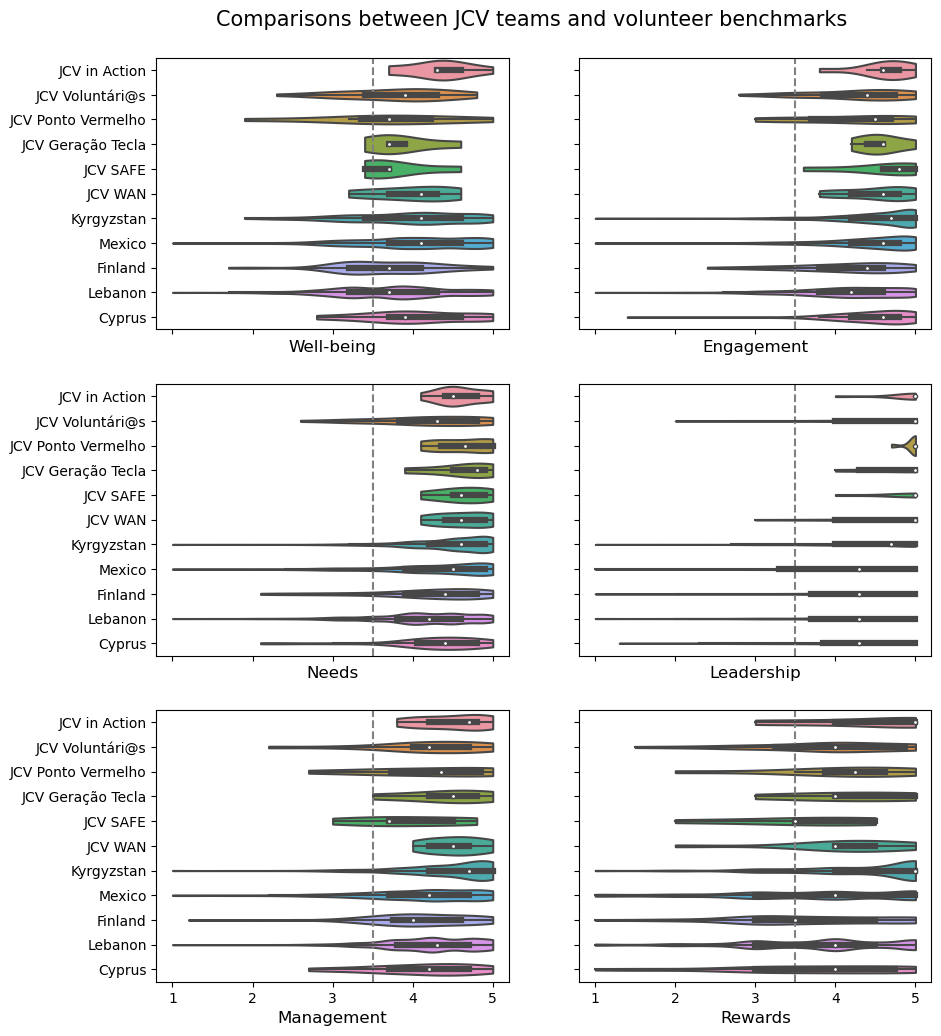

In [27]:
# Compare Portuguese youth teams with volunteer benchmaks
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Filter the DataFrame for teams from 'Portugal'
JCV_df = VOL_df[VOL_df['country'].isin(['Portugal'])].copy()
JCV_df['country'] = 'Portugal'


# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['country'].isin(['Mexico', 'Lebanon', 'Kyrgyzstan', 'Finland', 'Cyprus'])].copy()
Country_df['Team Name'] = Country_df['country']

# Merge the two dataframes
Portugal_df = pd.concat([JCV_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 2x2 grid of subplots sharing the same x-axis and y-axis
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax=sns.violinplot(
        data=Portugal_df, x=x_var, y='Team Name', cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle('Comparisons between JCV teams and volunteer benchmarks', x=0.5, y=0.92, fontsize=15)

plt.savefig('Portugal_JCV.png', bbox_inches='tight', pad_inches=0.1)

In [9]:

# Compare NSDS units in 2023 with staff benchmaks
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Staff'
STAFF_df = df[df['Position'] == 'Staff'].copy()

# Filter the DataFrame for teams from 'NSDS'
NSDS_df = STAFF_df[STAFF_df['Team Name'].isin(['NSDS managers',
                                               'CKD unit 2023',
                                               'VYED',
                                               'Organizational Transformation',
                                               'Policy and Disaster Law Unit'])].copy()
NSDS_df['country'] = 'NSDS'

# Filter the DataFrame for selected countries with many staff
Country_df = STAFF_df[STAFF_df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

#Create country Staff benchmarks
Country_df['Team Name'] = Country_df['country']

# Merge the two dataframes
NSDS_2023_df = pd.concat([NSDS_df, Country_df], ignore_index=True)

# Pivot Portugal_df
NSDS_table = pd.pivot_table(data=NSDS_2023_df, columns='Team Name',
                       values=['Well-being', 'Drained', 'Frustrated', 'Strong',
                               'Ideas', 'Values', 'Meaning', 'Stay',
                               'Needs', 'Autonomy', 'Belonging', 'Competence',
                               'Leadership', 'Listens', 'Understands', 'Encourages',
                               'Management', 'Rewards', 'Returns', 'Status'],
                       aggfunc=np.mean).round(1)

NSDS_table.tail(20)
#NSDS_table.info()

#NSDS_table.to_excel('Portugal_table.xlsx', index=False)

Team Name,CKD unit 2023,Cyprus,Finland,Mexico,NSDS managers,Organizational Transformation,Policy and Disaster Law Unit,VYED
Autonomy,4.4,3.7,4.3,3.9,4.1,3.9,4.2,4.3
Belonging,4.1,3.7,4.1,4.0,3.6,4.0,3.5,4.4
Competence,4.6,4.2,4.0,4.2,4.2,4.3,4.0,4.2
Drained,3.6,4.1,3.7,4.0,4.1,4.1,4.5,4.2
Encourages,4.9,3.5,4.1,3.8,4.0,4.1,3.5,4.2
Frustrated,3.4,4.2,3.6,3.4,4.7,3.7,4.8,4.2
Ideas,4.4,4.3,4.4,4.2,4.3,4.4,4.0,4.6
Leadership,4.7,3.5,4.2,3.8,4.0,4.2,3.8,4.5
Listens,4.9,3.5,4.2,3.9,4.1,4.1,4.2,4.6
Management,4.3,3.7,3.9,3.7,3.4,3.6,3.5,3.8


In [100]:
Portugal_df.head(200)

,Team Name,country,Well-being,Needs,Engagement,Autonomy,Belonging,Competence,Leadership,Management,...,Appreciated,Responsibilities,Work,Impact,Strong,Drained,Frustrated,Volunteer,Staff,Position
0,JCV in Action,Portugal,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5,5,5,5,7,1,1,1,0,Volunteer
1,JCV in Action,Portugal,3.7,4.1,4.4,4.3,4.3,3.5,5.0,4.7,...,5,4,4,5,6,4,3,1,0,Volunteer
2,JCV in Action,Portugal,4.3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5,5,5,5,6,3,1,1,0,Volunteer
3,JCV in Action,Portugal,4.3,4.8,4.6,4.7,5.0,4.5,4.7,4.7,...,3,5,5,5,6,2,2,1,0,Volunteer
4,JCV in Action,Portugal,4.3,4.5,3.8,4.7,4.3,4.5,4.0,4.3,...,3,4,4,5,5,2,1,1,0,Volunteer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Kyrgyzstan,Kyrgyzstan,3.9,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5,5,5,5,6,5,1,1,0,Volunteer
196,Kyrgyzstan,Kyrgyzstan,4.1,4.8,4.8,5.0,4.7,4.5,5.0,5.0,...,5,5,5,5,6,3,2,1,0,Volunteer
197,Kyrgyzstan,Kyrgyzstan,5.0,4.8,4.6,5.0,4.3,5.0,4.7,5.0,...,5,5,5,5,7,1,1,1,0,Volunteer
198,Kyrgyzstan,Kyrgyzstan,3.4,4.5,4.6,5.0,4.3,4.0,4.7,4.3,...,5,2,5,4,7,5,4,1,0,Volunteer


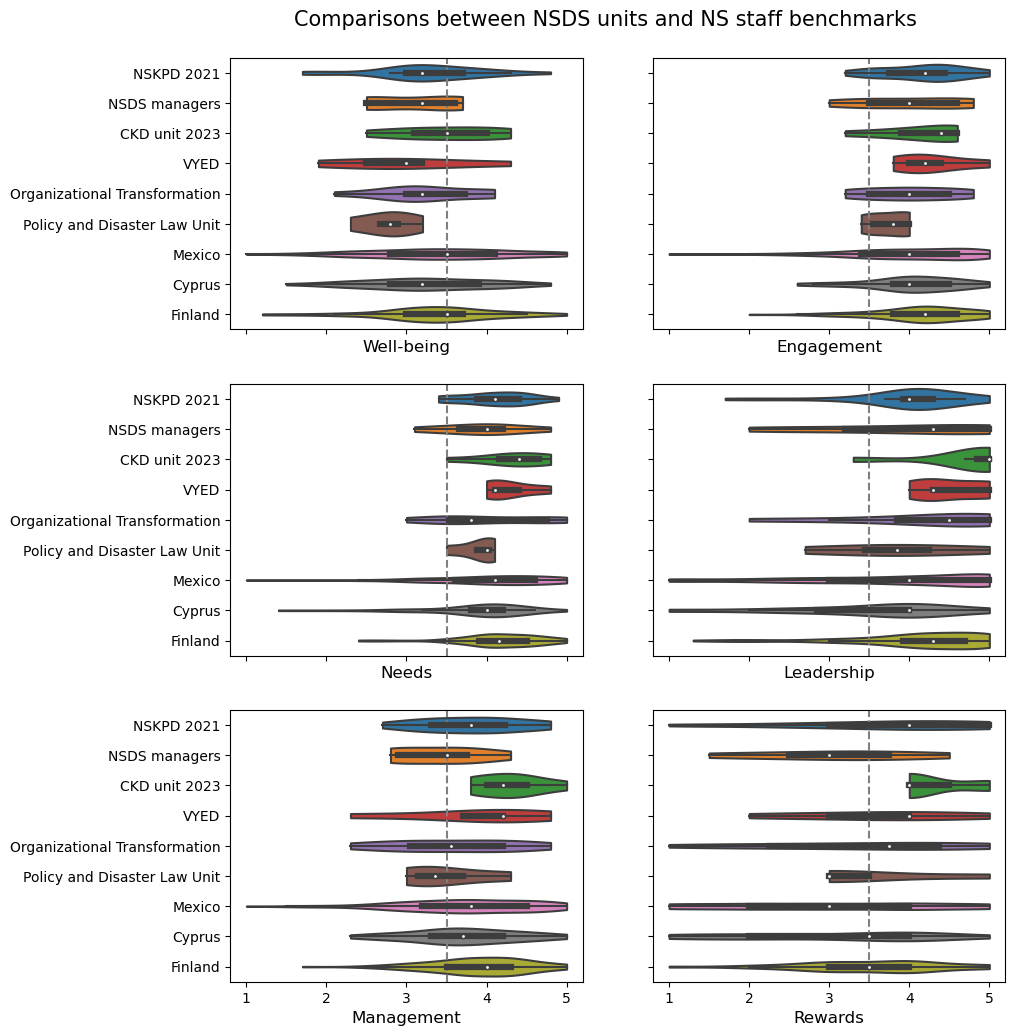

In [4]:

# Compare NSDS units with staff benchmaks: VIOLIN PLOTS FOR REPORT (3x2)
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Staff'
STAFF_df = df[df['Position'] == 'Staff'].copy()

# Filter the DataFrame for teams from 'NSDS'
NSDS_df = STAFF_df[STAFF_df['Team Name'].isin(['NSDS managers',
                                               'CKD unit 2023',
                                               'VYED',
                                               'Organizational Transformation',
                                               'Policy and Disaster Law Unit',
                                               'NSKPD 2021'])].copy()
NSDS_df['country'] = 'NSDS'

# Filter the DataFrame for selected countries with many staff
Country_df = STAFF_df[STAFF_df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

#Create country Staff benchmarks
Country_df['Team Name'] = Country_df['country']

# Merge the two dataframes
NSDS_2023_df = pd.concat([NSDS_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax=sns.violinplot(
        data=NSDS_2023_df, x=x_var, y='Team Name', cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle('Comparisons between NSDS units and NS staff benchmarks', x=0.5, y=0.92, fontsize=15)

plt.savefig('NSDS_units_violinplots.png', bbox_inches='tight', pad_inches=0.1)

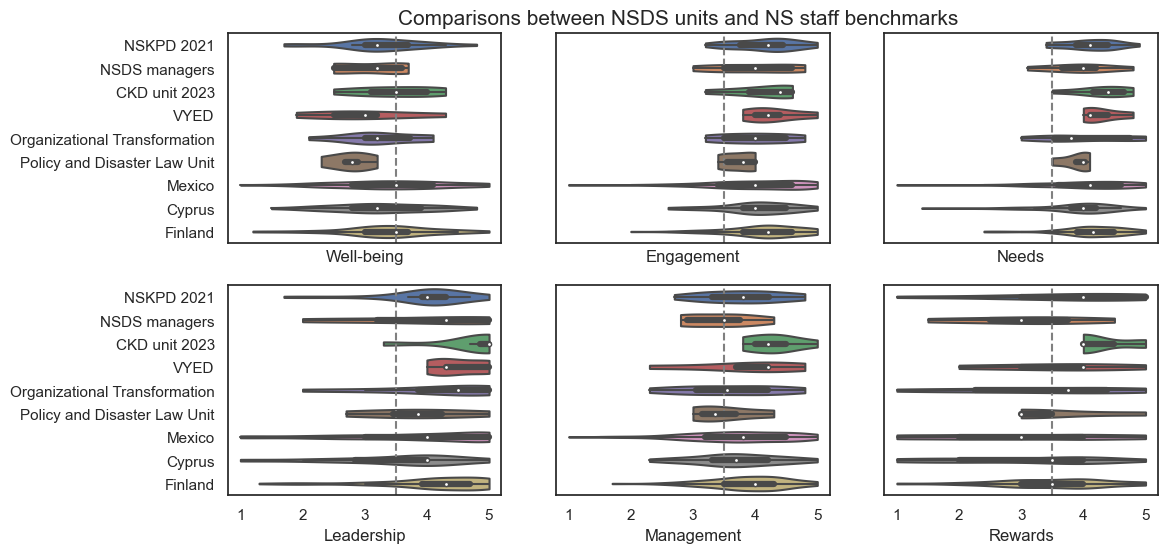

In [10]:

# Compare NSDS units with staff benchmaks: VIOLIN PLOTS FOR SLIDE (2x3)
sns.light_palette("#79C")
sns.set_theme(style="white")

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")
# Filter the dataframe for 'Position' = 'Staff'
STAFF_df = df[df['Position'] == 'Staff'].copy()

# Filter the DataFrame for teams from 'NSDS'
NSDS_df = STAFF_df[STAFF_df['Team Name'].isin(['NSDS managers',
                                               'CKD unit 2023',
                                               'VYED',
                                               'Organizational Transformation',
                                               'Policy and Disaster Law Unit',
                                               'NSKPD 2021'])].copy()
NSDS_df['country'] = 'NSDS'

# Filter the DataFrame for selected countries with many staff
Country_df = STAFF_df[STAFF_df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

#Create country Staff benchmarks
Country_df['Team Name'] = Country_df['country']

# Merge the two dataframes
NSDS_2023_df = pd.concat([NSDS_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 2x3 grid of subplots sharing the same x-axis and y-axis
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax=sns.violinplot(
        data=NSDS_2023_df, x=x_var, y='Team Name', cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle('Comparisons between NSDS units and NS staff benchmarks', x=0.5, y=0.92, fontsize=15)

plt.savefig('NSDS_units_violinplots_slide.png', bbox_inches='tight', pad_inches=0.1)

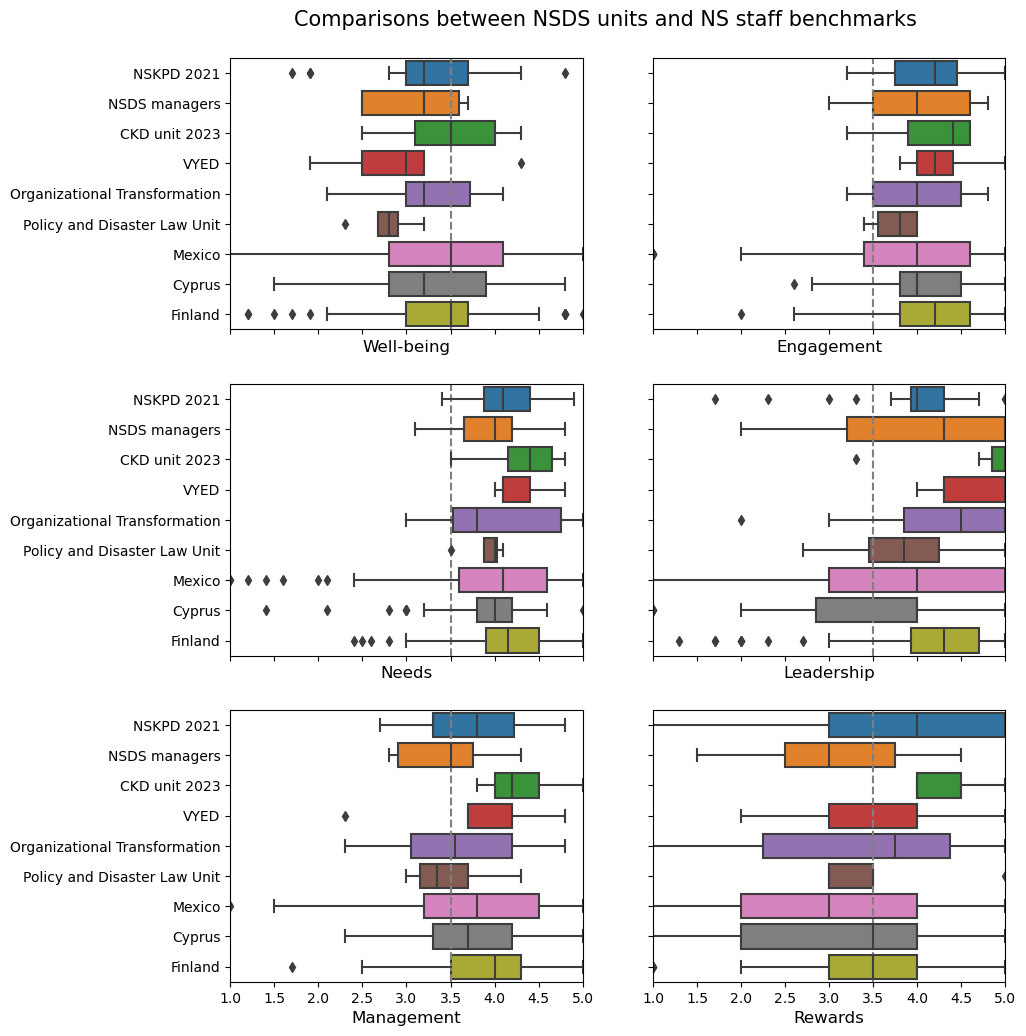

In [53]:

# Compare NSDS units with staff benchmaks: BOXPLOTS
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the dataframe for 'Position' = 'Staff'
STAFF_df = df[df['Position'] == 'Staff'].copy()

# Filter the DataFrame for teams from 'NSDS'
NSDS_df = STAFF_df[STAFF_df['Team Name'].isin(['NSDS managers',
                                               'CKD unit 2023',
                                               'VYED',
                                               'Organizational Transformation',
                                               'Policy and Disaster Law Unit',
                                               'NSKPD 2021'])].copy()
NSDS_df['country'] = 'NSDS'

# Filter the DataFrame for selected countries with many staff
Country_df = STAFF_df[STAFF_df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

#Create country Staff benchmarks
Country_df['Team Name'] = Country_df['country']

# Merge the two dataframes
NSDS_2023_df = pd.concat([NSDS_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 2x3 grid of subplots sharing the same x-axis and y-axis
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax=sns.boxplot(
        data=NSDS_2023_df, x=x_var, y='Team Name', ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
    ax.margins(x=0, y=0, tight=True)

plt.margins(x=0, y=0, tight=True)
plt.suptitle('Comparisons between NSDS units and NS staff benchmarks', x=0.5, y=0.92, fontsize=15)

plt.savefig('NSDS_units_boxplots.png', bbox_inches='tight', pad_inches=0)

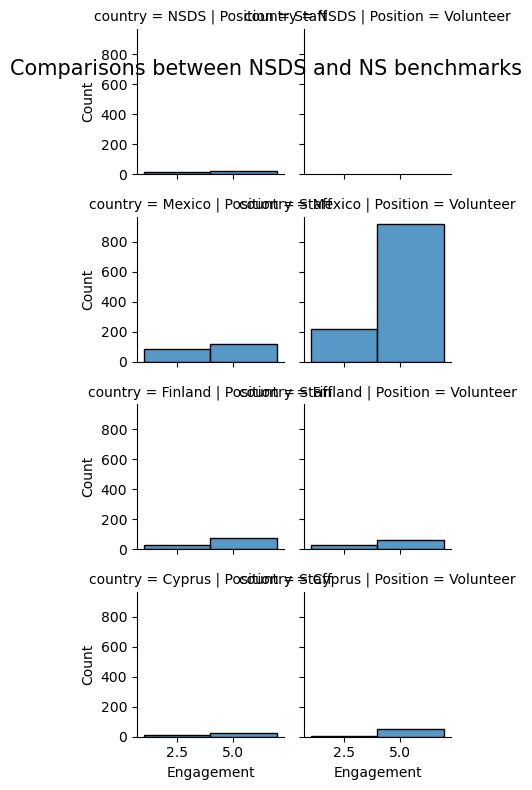

<Figure size 640x480 with 0 Axes>

In [6]:

# Compare Distributions in NSDS units with staff benchmaks: BOXPLOTS including volunteer benchmarks
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL_with_regions.txt")

# Filter the DataFrame for teams from 'NSDS'
NSDS_df = df[df['Team Name'].isin(['NSDS managers',
                                               'CKD unit 2023',
                                               'VYED',
                                               'Organizational Transformation',
                                               'Policy and Disaster Law Unit'
                                                ])].copy()
NSDS_df['country'] = 'NSDS'

# Filter the DataFrame for selected countries with many staff
Country_df = df[df['country'].isin(['Mexico', 'Finland', 'Cyprus'])].copy()

#Create country Staff benchmarks
Country_df['Team Name'] = Country_df['country']

# Merge the two dataframes
NSDS_2023_df = pd.concat([NSDS_df, Country_df], ignore_index=True)

Countries = ['Mexico', 'Finland', 'Cyprus']


sns.displot(
    NSDS_2023_df, x="Engagement", col="Position", row='country',
    binwidth=3, height=2, facet_kws=dict(margin_titles=False),
)

#plt.margins(x=0, y=0, tight=True)
plt.suptitle('Comparisons between NSDS and NS benchmarks', x=0.5, y=0.92, fontsize=15)

plt.show()
plt.savefig('NSDS_distPlots.png', bbox_inches='tight', pad_inches=0)

In [44]:
Country_df.tail()

,Team Name,country,Well-being,Needs,Engagement,Autonomy,Belonging,Competence,Leadership,Management,...,Appreciated,Responsibilities,Work,Impact,Strong,Drained,Frustrated,Volunteer,Staff,Position
5945,Mexico,Mexico,2.5,4.0,3.6,4.0,4.0,4.0,4.7,4.3,...,5,4,5,4,6,6,6,0,1,Staff
5946,Mexico,Mexico,3.7,4.0,4.2,3.3,4.0,5.0,4.0,4.5,...,5,4,4,5,7,5,3,0,1,Staff
5947,Mexico,Mexico,3.2,4.0,3.4,4.3,3.3,4.5,3.7,4.0,...,5,3,4,4,5,4,4,0,1,Staff
5948,Mexico,Mexico,3.7,3.2,3.4,3.7,2.0,4.5,4.3,2.7,...,4,1,1,5,6,4,3,0,1,Staff
5949,Mexico,Mexico,2.1,3.8,2.6,3.3,3.7,4.5,2.7,3.0,...,5,1,3,5,4,6,6,0,1,Staff
